In [1]:
import bs4 as bs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
#import edgar
import time
import numpy as np
from textblob import TextBlob
import pandas as pd
import seaborn as sns
from collections import Counter
from readability import Readability

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

import datetime as dt
import pandas as pd
import numpy as np
import warnings
import string
import spacy
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings('ignore')

headers = {'User-Agent': "wouter@vanzeijl.nl"}

In [2]:
abbott_stock = pd.read_csv("datasets/abbott dataset.csv")
accenture_stock = pd.read_csv("datasets/accenture dataset.csv")
adobe_stock = pd.read_csv("datasets/adobe dataset.csv")
alphabet_stock = pd.read_csv("datasets/alphabet dataset.csv")
amazon_stock = pd.read_csv("datasets/amazon dataset.csv")
amd_stock = pd.read_csv("datasets/amd dataset.csv")
amgen_stock = pd.read_csv("datasets/amgen dataset.csv")
analog_stock = pd.read_csv("datasets/analog dataset.csv")
apple_stock = pd.read_csv("datasets/apple dataset.csv")
att_stock = pd.read_csv("datasets/att dataset.csv")
boeing_stock = pd.read_csv("datasets/boeing dataset.csv")
booking_stock = pd.read_csv("datasets/booking dataset.csv")
broadcom_stock = pd.read_csv("datasets/broadcom dataset.csv")
caterpillar_stock = pd.read_csv("datasets/caterpillar dataset.csv")
chevron_stock = pd.read_csv("datasets/chevron dataset.csv")
cisco_stock = pd.read_csv("datasets/cisco dataset.csv")
cola_stock = pd.read_csv("datasets/cola dataset.csv")
deere_stock = pd.read_csv("datasets/deere dataset.csv")
disney_stock = pd.read_csv("datasets/disney dataset.csv")
electric_stock = pd.read_csv("datasets/electric dataset.csv")
elevance_stock = pd.read_csv("datasets/elevance dataset.csv")
exxon_stock = pd.read_csv("datasets/exxon dataset.csv")
home_stock = pd.read_csv("datasets/home dataset.csv")
honeywell_stock = pd.read_csv("datasets/honeywell dataset.csv")
ibm_stock = pd.read_csv("datasets/ibm dataset.csv")
intel_stock = pd.read_csv("datasets/intel dataset.csv")
lockhead_stock = pd.read_csv("datasets/lockhead dataset.csv")
materials_stock = pd.read_csv("datasets/materials dataset.csv")
mcdonalds_stock = pd.read_csv("datasets/mcdonalds dataset.csv")
medtronic_stock = pd.read_csv("datasets/medtronic dataset.csv")
meta_stock = pd.read_csv("datasets/meta dataset.csv")
microsoft_stock = pd.read_csv("datasets/microsoft dataset.csv")
nike_stock = pd.read_csv("datasets/nike dataset.csv")
nvidia_stock = pd.read_csv("datasets/nvidia dataset.csv")
oracle_stock = pd.read_csv("datasets/oracle dataset.csv")
pfizer_stock = pd.read_csv("datasets/pfizer dataset.csv")
philips_stock = pd.read_csv("datasets/philips dataset.csv")
prologis_stock = pd.read_csv("datasets/prologis dataset.csv")
salesforce_stock = pd.read_csv("datasets/salesforce dataset.csv")
service_stock = pd.read_csv("datasets/service dataset.csv")
starbucks_stock = pd.read_csv("datasets/starbucks dataset.csv")
stryker_stock = pd.read_csv("datasets/stryker dataset.csv")
tesla_stock = pd.read_csv("datasets/tesla dataset.csv")
thermo_stock = pd.read_csv("datasets/thermo dataset.csv")
union_stock = pd.read_csv("datasets/union dataset.csv")
united_stock = pd.read_csv("datasets/united health dataset.csv")
ups_stock = pd.read_csv("datasets/ups dataset.csv")
verizon_stock = pd.read_csv("datasets/verizon dataset.csv")
visa_stock = pd.read_csv("datasets/visa dataset.csv")
wallmart_stock = pd.read_csv("datasets/wallmart dataset.csv")

In [3]:
frames = [abbott_stock, accenture_stock, adobe_stock, alphabet_stock, amazon_stock, amd_stock, amgen_stock, analog_stock,
          apple_stock, att_stock, boeing_stock, booking_stock,  broadcom_stock, caterpillar_stock, chevron_stock, 
          cisco_stock, cola_stock, deere_stock, disney_stock, electric_stock, elevance_stock, exxon_stock, home_stock, 
          honeywell_stock, ibm_stock, intel_stock, lockhead_stock, materials_stock, mcdonalds_stock, meta_stock, medtronic_stock, 
          microsoft_stock, nike_stock, nvidia_stock, oracle_stock, pfizer_stock, philips_stock, prologis_stock, salesforce_stock, 
          service_stock, starbucks_stock, stryker_stock, tesla_stock, thermo_stock, union_stock,
          united_stock, ups_stock, verizon_stock, visa_stock, wallmart_stock]


In [4]:
frames_names = ['abbott', 'accenture', 'adobe', 'alphabet', 'amazon', 'amd', 'amgen', 'analog',
          'apple', 'att', 'boeing', 'booking',  'broadcom', 'caterpillar', 'chevron', 
          'cisco', 'cola', 'deere', 'disney', 'electric', 'elevance', 'exxon', 'home', 
          'honeywell', 'ibm', 'intel', 'lockhead', 'materials', 'mcdonalds', 'meta', 'medtronic', 
          'microsoft', 'nike', 'nvidia', 'oracle', 'pfize', 'philips', 'prologis', 'salesforce', 
          'service', 'starbucks', 'stryker', 'tesla', 'thermo', 'union',
          'united', 'ups', 'verizon', 'visa', 'wallmart']

In [5]:
count = 0
for i in frames:
    i.insert(loc=0, column='Company', value=frames_names[count])
    count += 1

In [6]:
#for company_df in frames:
#    company_df['Price change'] = np.nan
#    for i in range(0, len(company_df['Adj Close'])):
#        try:
#            if isinstance(company_df['press release'].iloc[i], str):
#                for j in range(0,12):
#                    change = company_df['Adj Close'].iloc[i+j] - company_df['Adj Close'].iloc[i]
#                    company_df['Price change'].iloc[i+j] = change
#        except:
#            continue

In [7]:
#for company_df in frames:
#    company_df['Price change pct'] = np.nan
#    for i in range(0, len(company_df['Adj Close'])):
#        try:
#            if isinstance(company_df['press release'].iloc[i], str):
#                for j in range(0,12):
#                    pct_change = (company_df['Adj Close'].iloc[i+j] - company_df['Adj Close'].iloc[i]) / company_df['Adj Close'].iloc[i] * 100
#                    company_df['Price change pct'].iloc[i+j] = pct_change
#        except:
#            continue

In [8]:
result = pd.concat(frames)

result.dropna(subset=['press release'], inplace=True)

In [9]:
result

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739
...,...,...,...,...,...,...,...,...
37,wallmart,2018-02-01,81.499840,307532700,We have good momentum in the business with sol...,-7.329239,-10.949623,2.993950
49,wallmart,2019-02-01,91.758194,166799500,"We had a good year, and I want to thank our as...",-16.516945,-18.641411,-11.757950
61,wallmart,2020-02-01,101.834824,132414100,We thank our associates for another good year....,-33.246933,-31.088043,-12.444900
73,wallmart,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,-11.647019,-20.448700,-11.773529


In [10]:
result['Price change pct 12mo'] = np.nan
for i in range(0, len(result['Adj Close'])):
    pct_change = (result['Price change 12mo'].iloc[i] / result['Adj Close'].iloc[i]) * 100
    result['Price change pct 12mo'].iloc[i] = pct_change

In [11]:
result['Price change pct 8mo'] = np.nan
for i in range(0, len(result['Adj Close'])):
    pct_change = (result['Price change 8mo'].iloc[i] / result['Adj Close'].iloc[i]) * 100
    result['Price change pct 8mo'].iloc[i] = pct_change

In [12]:
result['Price change pct 4mo'] = np.nan
for i in range(0, len(result['Adj Close'])):
    pct_change = (result['Price change 4mo'].iloc[i] / result['Adj Close'].iloc[i]) * 100
    result['Price change pct 4mo'].iloc[i] = pct_change

In [13]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,Price change pct 4mo
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,-6.036055
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,9.521674
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,6.129371
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,-2.448589
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,-10.638353
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,-1.691778
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,11.148558
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,11.966855
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,-1.159534
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,-1.271246


In [14]:
to_append = []

for i in range(0, len(result['Price change 12mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 12mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)
result['Price change sign 12mo'] = to_append

In [15]:
to_append = []

for i in range(0, len(result['Price change 8mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 8mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)

        
result['Price change sign 8mo'] = to_append

In [16]:
to_append = []

for i in range(0, len(result['Price change 4mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 4mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)
        
result['Price change sign 4mo'] = to_append

In [17]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,Price change pct 4mo,Price change sign 12mo,Price change sign 8mo,Price change sign 4mo
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,-6.036055,1,-1,-1
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,9.521674,1,1,1
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,6.129371,1,1,1
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,-2.448589,1,-1,-1
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,-10.638353,-1,-1,-1
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,-1.691778,1,1,-1
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,11.148558,1,-1,1
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,11.966855,1,1,1
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,-1.159534,-1,-1,-1
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,-1.271246,1,1,-1


In [18]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [19]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        SIA = getSIA(result['press release'].iloc[i])
        compound.append(SIA['compound'])
        neg.append(SIA['neg'])
        neu.append(SIA['neu'])
        pos.append(SIA['pos'])
    else:
        compound.append(np.nan)
        neg.append(np.nan)
        neu.append(np.nan)
        pos.append(np.nan)

In [20]:
result['Compound'] = compound
result['Negative'] = neg
result['Neutral'] = neu
result['Positive'] = pos

In [21]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,Price change pct 4mo,Price change sign 12mo,Price change sign 8mo,Price change sign 4mo,Compound,Negative,Neutral,Positive
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,-6.036055,1,-1,-1,0.8882,0.000,0.723,0.277
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,9.521674,1,1,1,0.9217,0.000,0.725,0.275
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,6.129371,1,1,1,0.8932,0.000,0.592,0.408
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,-2.448589,1,-1,-1,0.8103,0.031,0.757,0.212
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,-10.638353,-1,-1,-1,0.8360,0.000,0.806,0.194
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,-1.691778,1,1,-1,0.9912,0.008,0.736,0.255
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,11.148558,1,-1,1,0.9869,0.011,0.723,0.266
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,11.966855,1,1,1,0.9847,0.000,0.757,0.243
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,-1.159534,-1,-1,-1,0.9891,0.009,0.729,0.262
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,-1.271246,1,1,-1,0.9918,0.000,0.737,0.263


In [22]:
result['polarity'] = np.nan
result['subjectivity'] = np.nan

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        senti = TextBlob(result['press release'].iloc[i]).sentiment.polarity
        subj = TextBlob(result['press release'].iloc[i]).sentiment.subjectivity
        result['polarity'].iloc[i] = senti
        result['subjectivity'].iloc[i] = subj

In [23]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,Price change pct 4mo,Price change sign 12mo,Price change sign 8mo,Price change sign 4mo,Compound,Negative,Neutral,Positive,polarity,subjectivity
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,-6.036055,1,-1,-1,0.8882,0.000,0.723,0.277,0.505273,0.704909
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,9.521674,1,1,1,0.9217,0.000,0.725,0.275,0.362500,0.731250
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,6.129371,1,1,1,0.8932,0.000,0.592,0.408,0.671667,0.756667
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,-2.448589,1,-1,-1,0.8103,0.031,0.757,0.212,0.384091,0.638636
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,-10.638353,-1,-1,-1,0.8360,0.000,0.806,0.194,0.307273,0.579242
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,-1.691778,1,1,-1,0.9912,0.008,0.736,0.255,0.215261,0.530067
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,11.148558,1,-1,1,0.9869,0.011,0.723,0.266,0.437470,0.545788
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,11.966855,1,1,1,0.9847,0.000,0.757,0.243,0.367677,0.507071
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,-1.159534,-1,-1,-1,0.9891,0.009,0.729,0.262,0.299306,0.470833
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,-1.271246,1,1,-1,0.9918,0.000,0.737,0.263,0.379167,0.635000


In [24]:
stop_words = stopwords.words('english')
punctuation = string.punctuation

In [25]:
result["text length"] = np.nan
result['word_count'] = np.nan
result['word_density'] = np.nan
result['punctuation_count'] = np.nan
result['upper_case_word_count'] = np.nan
result['stopword_count'] = np.nan
result["readability dale_chall"] = np.nan
result["readability flesch_reading_ease"] = np.nan

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        result["text length"].iloc[i] = len(result["press release"].iloc[i])
        result["word_count"].iloc[i] = len(result["press release"].iloc[i].split())
        result["word_density"].iloc[i] = result["text length"].iloc[i] / (result['word_count'].iloc[i] +1)
        
        x = result['press release'].iloc[i]
        y = len("".join(_ for _ in x if _ in punctuation))
        result["punctuation_count"].iloc[i] = y
        
        x1 = result['press release'].iloc[i]
        y1 = len([wrd for wrd in x1.split() if wrd.isupper()])
        result["upper_case_word_count"].iloc[i] = y1
        
        x2 = result['press release'].iloc[i]
        y2 = len([wrd for wrd in x.split() if wrd.lower() in stop_words])
        result["stopword_count"].iloc[i] = y2
        
        
        x3 = result['press release'].iloc[i]
        x3 = x3 * 5
        r = Readability(x3)
        dc2 = r.dale_chall()
        result["readability dale_chall"].iloc[i] = dc2.score
        
        dc3 = r.flesch()
        result["readability flesch_reading_ease"].iloc[i] = dc3.score
        
        
        
        #if len(result['press release'].iloc[i].split()) > 100:
        #    x3 = result['press release'].iloc[i]
        #    r = Readability(x3)
        #    dc = r.dale_chall()
        #    result["readability"].iloc[i] = dc.score
        #else:
        #    x3 = result['press release'].iloc[i]
        #    while len(x3.split()) < 101:
        #        x3 = x3 + x3
        #    r = Readability(x3)
        #    dc2 = r.dale_chall()
        #    result["readability"].iloc[i] = dc2.score

        
    

#result["text length"] = result["press release"].apply(len)
#result['word_count'] = result['press release'].apply(lambda x: len(x.split()))
#result['word_density'] = result['text length'] / (result['word_count']+1)
#result['punctuation_count'] = result['press release'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

#result['upper_case_word_count'] = result['press release'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
#result['stopword_count'] = result['press release'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

#result["readability"] = result["press release"].apply()

In [26]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,polarity,subjectivity,text length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,0.505273,0.704909,197.0,34.0,5.628571,3.0,0.0,12.0,10.826444,51.835000
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,0.362500,0.731250,302.0,46.0,6.425532,6.0,0.0,18.0,10.120095,29.122196
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,0.671667,0.756667,143.0,21.0,6.500000,4.0,0.0,6.0,11.506582,38.976889
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,0.384091,0.638636,258.0,40.0,6.292683,6.0,2.0,15.0,13.393450,24.765068
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,0.307273,0.579242,244.0,40.0,5.951220,5.0,2.0,14.0,12.395333,37.641667
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,0.215261,0.530067,963.0,148.0,6.463087,20.0,1.0,60.0,11.369434,27.983671
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,0.437470,0.545788,710.0,115.0,6.120690,16.0,1.0,49.0,11.015448,24.908491
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,0.367677,0.507071,741.0,122.0,6.024390,9.0,0.0,53.0,10.520934,25.897885
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,0.299306,0.470833,833.0,131.0,6.310606,16.0,0.0,63.0,10.930851,32.052173
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,0.379167,0.635000,978.0,149.0,6.520000,21.0,2.0,53.0,12.012235,16.882339


In [27]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change pct 12mo', 'Price change pct 8mo', 'Price change pct 4mo',
       'Price change sign 12mo', 'Price change sign 8mo',
       'Price change sign 4mo', 'Compound', 'Negative', 'Neutral', 'Positive',
       'polarity', 'subjectivity', 'text length', 'word_count', 'word_density',
       'punctuation_count', 'upper_case_word_count', 'stopword_count',
       'readability dale_chall', 'readability flesch_reading_ease'],
      dtype='object')

In [28]:
nltk.download('averaged_perceptron_tagger')
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

result['noun_count'] = np.nan
result['verb_count'] = np.nan
result['adj_count'] = np.nan
result['adv_count'] = np.nan
result['pron_count'] = np.nan



for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        x = result['press release'].iloc[i]
        y = pos_check(x, 'noun')
        result['noun_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'verb')
        result['verb_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'adj')
        result['adj_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'adv')
        result['adv_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'pron')
        result['pron_count'].iloc[i] = y


#result['noun_count'] = result['press release'].apply(lambda x: pos_check(x, 'noun'))
#result['verb_count'] = result['press release'].apply(lambda x: pos_check(x, 'verb'))
#result['adj_count'] = result['press release'].apply(lambda x: pos_check(x, 'adj'))
#result['adv_count'] = result['press release'].apply(lambda x: pos_check(x, 'adv'))
#result['pron_count'] = result['press release'].apply(lambda x: pos_check(x, 'pron'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\woute\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,punctuation_count,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,3.0,0.0,12.0,10.826444,51.835000,8.0,6.0,6.0,5.0,4.0
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,6.0,0.0,18.0,10.120095,29.122196,14.0,6.0,6.0,2.0,5.0
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,4.0,0.0,6.0,11.506582,38.976889,5.0,6.0,4.0,1.0,2.0
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,6.0,2.0,15.0,13.393450,24.765068,12.0,6.0,5.0,0.0,3.0
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,5.0,2.0,14.0,12.395333,37.641667,12.0,6.0,5.0,1.0,3.0
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,20.0,1.0,60.0,11.369434,27.983671,42.0,17.0,23.0,7.0,14.0
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,16.0,1.0,49.0,11.015448,24.908491,31.0,15.0,13.0,3.0,11.0
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,9.0,0.0,53.0,10.520934,25.897885,37.0,17.0,10.0,7.0,13.0
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,16.0,0.0,63.0,10.930851,32.052173,37.0,17.0,13.0,4.0,15.0
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,21.0,2.0,53.0,12.012235,16.882339,54.0,21.0,10.0,5.0,18.0


In [30]:
# top words
result["top_words"] = np.nan

from collections import Counter

def word_count(text):
    doc = nlp(text)
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    
    word_freq = Counter(words)
    common_words = word_freq.most_common(10)
    return common_words

for i in range(len(result["press release"])):
    if isinstance(result['press release'].iloc[i], str):
        top_words = word_count(result['press release'].iloc[i])
        result["top_words"].iloc[i] = top_words


In [31]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,0.0,12.0,10.826444,51.835000,8.0,6.0,6.0,5.0,4.0,"[(2017, 1), (great, 1), (year, 1), (performed,..."
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,0.0,18.0,10.120095,29.122196,14.0,6.0,6.0,2.0,5.0,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo..."
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,0.0,6.0,11.506582,38.976889,5.0,6.0,4.0,1.0,2.0,"[(growth, 2), (focus, 1), (organic, 1), (drivi..."
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,2.0,15.0,13.393450,24.765068,12.0,6.0,5.0,0.0,3.0,"[(EPS, 2), (growth, 2), (Despite, 1), (challen..."
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,2.0,14.0,12.395333,37.641667,12.0,6.0,5.0,1.0,3.0,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,..."
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,1.0,60.0,11.369434,27.983671,42.0,17.0,23.0,7.0,14.0,"[(growth, 4), (year, 3), (percent, 3), ($, 2),..."
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,1.0,49.0,11.015448,24.908491,31.0,15.0,13.0,3.0,11.0,"[(delivered, 2), (year, 2), (business, 2), (fi..."
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,0.0,53.0,10.520934,25.897885,37.0,17.0,10.0,7.0,13.0,"[(fiscal, 3), (2020, 2), (growth, 2), (busines..."
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,0.0,63.0,10.930851,32.052173,37.0,17.0,13.0,4.0,15.0,"[(clients, 3), (fiscal, 2), (results, 2), (peo..."
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,2.0,53.0,12.012235,16.882339,54.0,21.0,10.0,5.0,18.0,"[(clients, 3), (people, 2), (communities, 2), ..."


In [32]:
up_12mo = []
down_12mo = []
neutral_12mo = []

for i in result['Price change pct 12mo']:
    if i > 5:
        up_12mo.append(i)
    elif i < -5:
        down_12mo.append(i)
    else:
        neutral_12mo.append(i)
        
up = [len(up_12mo)]
down= [len(down_12mo)]
neutral = [len(neutral_12mo)]

up_8mo = []
down_8mo = []
neutral_8mo = []

for i in result['Price change pct 8mo']:
    if i > 5:
        up_8mo.append(i)
    elif i < -5:
        down_8mo.append(i)
    else:
        neutral_8mo.append(i)
        
up.append(len(up_8mo))
down.append(len(down_8mo))
neutral.append(len(neutral_8mo))

up_4mo = []
down_4mo = []
neutral_4mo = []

for i in result['Price change pct 4mo']:
    if i > 5:
        up_4mo.append(i)
    elif i < -5:
        down_4mo.append(i)
    else:
        neutral_4mo.append(i)
        
up.append(len(up_4mo))
down.append(len(down_4mo))
neutral.append(len(neutral_4mo))

up = up[::-1]
down = down[::-1]
neutral = neutral[::-1]

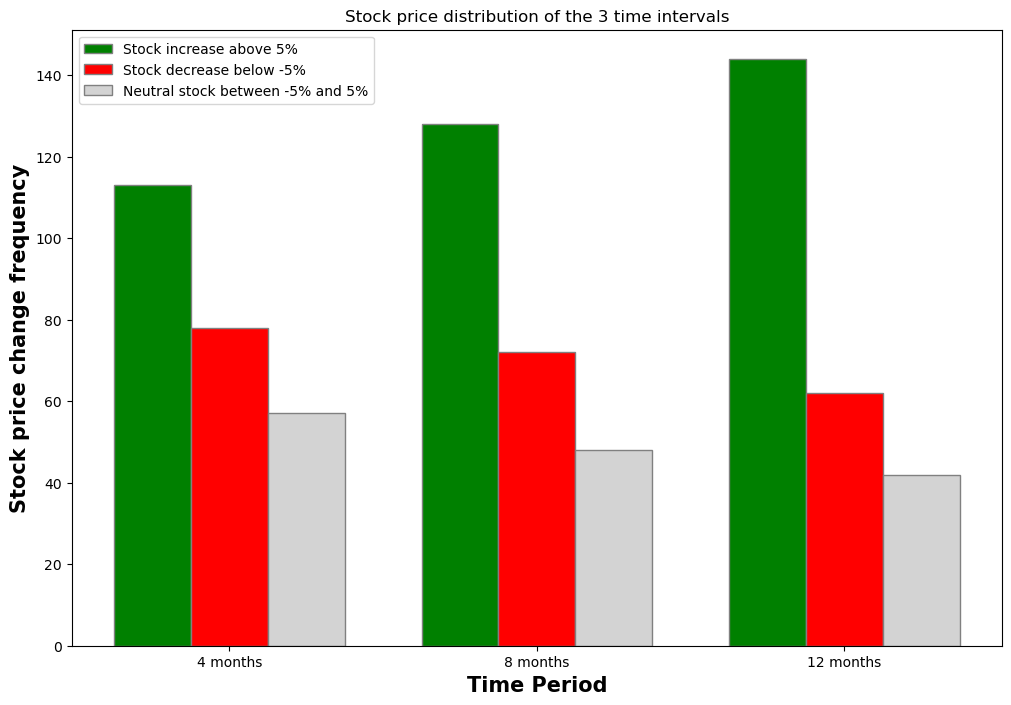

In [33]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(up))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, up, color ='g', width = barWidth,
        edgecolor ='grey', label ='Stock increase above 5%')
plt.bar(br2, down, color ='r', width = barWidth,
        edgecolor ='grey', label ='Stock decrease below -5%')
plt.bar(br3, neutral, color ='lightgrey', width = barWidth,
        edgecolor ='grey', label ='Neutral stock between -5% and 5%')

plt.xlabel('Time Period', fontweight ='bold', fontsize = 15)
plt.ylabel('Stock price change frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(up))],
        ['4 months', '8 months', '12 months'])

ax.set_title("Stock price distribution of the 3 time intervals")

#ax.text(x=0.12, y=.93, s="Stock price distribution for each time period", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
#ax.text(x=0.12, y=.90, s="Difference in minutes between scheduled and actual arrival time averaged over each month", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)
#ax.bar_label(fig, labels=[f'{e:,.1f}' for e in up], padding=3, color='black', fontsize=8) 

 
plt.legend()
plt.show()

In [34]:
up

[113, 128, 144]

In [35]:
inverselist = up[::-1]
inverselist

[144, 128, 113]

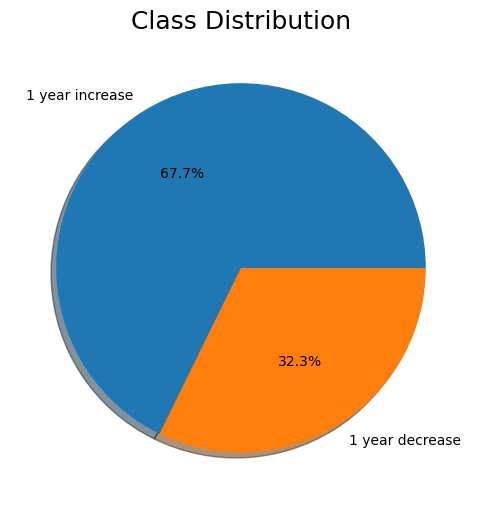

,Adj Close,Volume,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,Price change pct 4mo,Price change sign 12mo,Price change sign 8mo,...,punctuation_count,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count
count,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,188.598811,3.394098e+08,17.623202,6.964820,4.290364,10.928597,6.380450,3.005439,0.354839,0.225806,...,15.306452,1.790323,45.258065,11.412968,22.828400,37.737903,17.455645,13.947581,3.899194,9.697581
std,284.502164,5.189971e+08,72.128091,74.073769,47.943331,26.017432,22.823048,14.962102,0.936818,0.976142,...,11.423520,2.319689,26.893062,1.315383,19.892583,24.992790,9.524635,8.718336,3.584989,5.410411
min,13.740000,7.179000e+06,-440.849854,-812.919922,-212.569824,-61.584629,-56.687739,-55.428084,-1.000000,-1.000000,...,2.000000,0.000000,6.000000,6.796036,-148.456942,5.000000,4.000000,1.000000,0.000000,2.000000
25%,70.635208,6.225920e+07,-4.581470,-7.209635,-8.710438,-5.020289,-6.550839,-7.583682,-1.000000,-1.000000,...,8.000000,0.000000,27.000000,10.730113,16.408848,22.000000,11.000000,8.000000,2.000000,6.000000
50%,122.636677,1.382164e+08,9.799576,4.883839,2.193904,9.371540,5.748807,3.636066,1.000000,1.000000,...,13.000000,1.000000,39.000000,11.480041,24.806679,32.000000,16.000000,12.000000,3.000000,8.000000
75%,203.677041,3.791968e+08,35.436981,22.120811,16.623924,25.677434,18.792654,12.300843,1.000000,1.000000,...,18.000000,2.000000,54.250000,12.107737,32.579859,45.000000,21.000000,17.250000,5.000000,13.000000
max,2456.129883,3.158994e+09,454.900024,429.540161,417.220093,95.127657,124.818042,45.899602,1.000000,1.000000,...,91.000000,14.000000,197.000000,18.556498,54.473407,185.000000,62.000000,53.000000,21.000000,32.000000


In [36]:
ones = len(result[result['Price change sign 12mo']==1])
minus = len(result[result['Price change sign 12mo']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['1 year increase','1 year decrease'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

result.describe()

In [37]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change pct 12mo', 'Price change pct 8mo', 'Price change pct 4mo',
       'Price change sign 12mo', 'Price change sign 8mo',
       'Price change sign 4mo', 'Compound', 'Negative', 'Neutral', 'Positive',
       'polarity', 'subjectivity', 'text length', 'word_count', 'word_density',
       'punctuation_count', 'upper_case_word_count', 'stopword_count',
       'readability dale_chall', 'readability flesch_reading_ease',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'top_words'],
      dtype='object')

In [38]:
time_periods = result[["Price change pct 12mo", "Price change pct 8mo", "Price change pct 4mo"]]

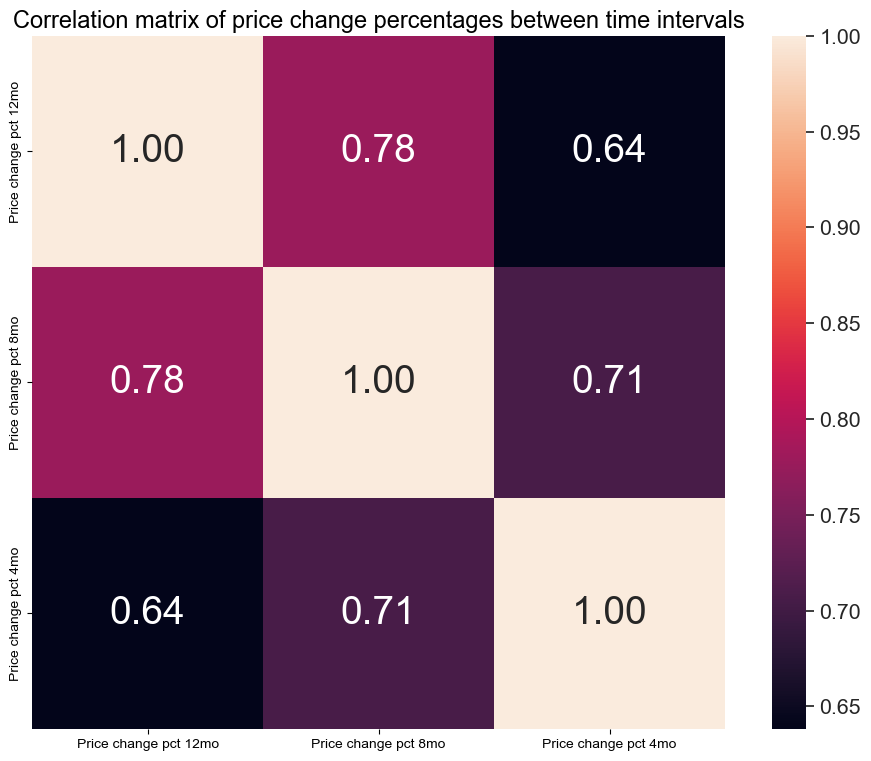

In [39]:
f, ax = plt.subplots(figsize=(12, 9))

corrmat = time_periods.corr()
k = 3 
cols = corrmat.nlargest(k, 'Price change pct 12mo')['Price change pct 12mo'].index
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 28}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation matrix of price change percentages between time intervals', fontsize = 17)

plt.show()

In [40]:
corr_print = result.drop(columns=['Price change 12mo', 'Price change 8mo', 'Price change 4mo', 'Price change sign 8mo', 'Price change sign 4mo', 'Price change pct 12mo', 'Price change pct 8mo', 'Price change pct 4mo'])

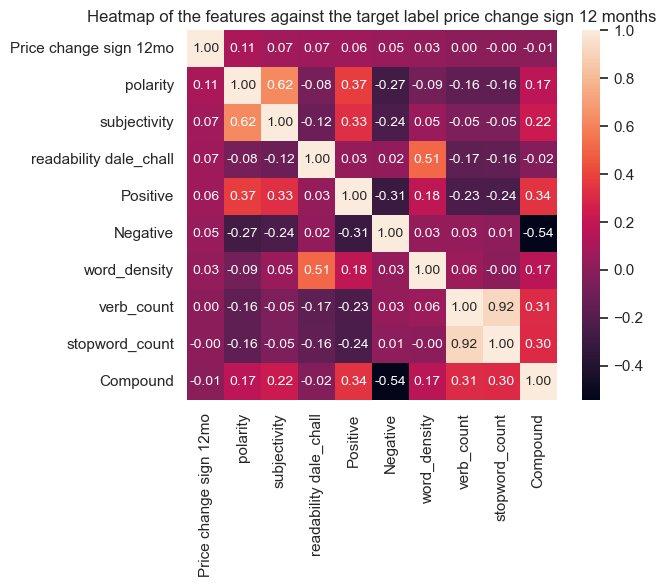

In [41]:
corrmat = corr_print.corr()
k = 10 
cols = corrmat.nlargest(k, 'Price change sign 12mo')['Price change sign 12mo'].index
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Heatmap of the features against the target label price change sign 12 months')
plt.show()

In [42]:
corrmat['Price change sign 12mo'].sort_values(ascending=False)

Price change sign 12mo             1.000000
polarity                           0.112370
subjectivity                       0.073096
readability dale_chall             0.067518
Positive                           0.062566
Negative                           0.046865
word_density                       0.028198
verb_count                         0.001317
stopword_count                    -0.004614
Compound                          -0.006527
pron_count                        -0.006699
Adj Close                         -0.018493
Volume                            -0.020415
text length                       -0.027876
word_count                        -0.030271
adj_count                         -0.037865
adv_count                         -0.053197
noun_count                        -0.054630
Neutral                           -0.080419
upper_case_word_count             -0.092310
readability flesch_reading_ease   -0.095622
punctuation_count                 -0.095700
Name: Price change sign 12mo, dt

# 16.

In [43]:
test = result[result["Company"] == 'abbott']
test2 = result[result["Company"] == 'accenture']

r = np.corrcoef(test['Price change pct 12mo'], test2['Price change pct 12mo'])
r

array([[1.        , 0.47401933],
       [0.47401933, 1.        ]])

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

df = pd.DataFrame({
    'accenture': result[result['Company'] == 'accenture']['Price change pct 12mo'].values,
    'adobe': result[result['Company'] == 'adobe']['Price change pct 12mo'].values, 
    'amazon': result[result['Company'] == 'amazon']['Price change pct 12mo'].values
})

#X = result[result['Company'] == 'accenture']['Price change pct 12mo']
X = df[['accenture', 'adobe']]
y = result[result['Company'] == 'abbott']["Price change pct 12mo"]
#X = X.values.reshape(-1,1)
#y = y.values.reshape(-1,1)

model.fit(X, y)
r_squared = model.score(X, y)
r_squared




0.9968255722672187

In [45]:
result[result['Company'] == 'accenture']['Price change pct 12mo']

45    14.951111
57    10.120912
69    31.442779
81   -16.102503
93     9.104948
Name: Price change pct 12mo, dtype: float64

In [46]:
X = result[result['Company'] == 'accenture']["Price change pct 12mo"]

In [47]:
X

45    14.951111
57    10.120912
69    31.442779
81   -16.102503
93     9.104948
Name: Price change pct 12mo, dtype: float64

In [48]:
company_list = ['abbott', 'accenture', 'adobe', 'alphabet', 'amazon', 'amd', 'amgen', 'analog',
          'apple', 'att', 'boeing', 'booking',  'broadcom', 'caterpillar', 'chevron', 
          'cisco', 'cola', 'deere', 'disney', 'electric', 'elevance', 'exxon', 'home', 
          'honeywell', 'ibm', 'intel', 'lockhead', 'materials', 'mcdonalds', 'meta', 'medtronic', 
          'microsoft', 'nike', 'nvidia', 'oracle', 'pfize', 'philips', 'prologis', 'salesforce', 
          'service', 'starbucks', 'stryker', 'tesla', 'thermo', 'union',
          'united', 'ups', 'verizon', 'visa', 'wallmart']

In [49]:
company_value_count = []
company_df = result[['Company', "Price change pct 12mo"]]

for i in company_list:
    per_company = company_df[company_df['Company'] == i]
    above_5 = 0
    between_5 = 0
    below_5 = 0
    for j in per_company["Price change pct 12mo"]:
        if j >= 5:
            above_5 += 1
        elif j <= -5:
            below_5 += 1
        else:
            between_5 += 1
    
    company_value_count.append((i, above_5, below_5, between_5))
    

In [50]:
company_value_count

[('abbott', 3, 1, 1),
 ('accenture', 4, 1, 0),
 ('adobe', 4, 1, 0),
 ('alphabet', 2, 1, 0),
 ('amazon', 2, 1, 2),
 ('amd', 4, 1, 0),
 ('amgen', 4, 0, 1),
 ('analog', 3, 1, 1),
 ('apple', 4, 1, 1),
 ('att', 1, 3, 1),
 ('boeing', 0, 3, 2),
 ('booking', 3, 2, 0),
 ('broadcom', 4, 0, 1),
 ('caterpillar', 4, 1, 0),
 ('chevron', 3, 2, 0),
 ('cisco', 3, 1, 1),
 ('cola', 3, 0, 2),
 ('deere', 4, 1, 0),
 ('disney', 1, 3, 0),
 ('electric', 2, 3, 0),
 ('elevance', 4, 0, 1),
 ('exxon', 2, 2, 1),
 ('home', 4, 0, 1),
 ('honeywell', 4, 1, 0),
 ('ibm', 2, 2, 1),
 ('intel', 0, 2, 3),
 ('lockhead', 3, 2, 0),
 ('materials', 2, 1, 2),
 ('mcdonalds', 3, 0, 2),
 ('meta', 2, 1, 0),
 ('medtronic', 2, 2, 0),
 ('microsoft', 5, 0, 1),
 ('nike', 3, 0, 2),
 ('nvidia', 3, 2, 0),
 ('oracle', 3, 1, 1),
 ('pfize', 3, 0, 2),
 ('philips', 1, 1, 3),
 ('prologis', 3, 2, 0),
 ('salesforce', 4, 1, 0),
 ('service', 4, 1, 0),
 ('starbucks', 4, 3, 1),
 ('stryker', 3, 0, 2),
 ('tesla', 0, 0, 0),
 ('thermo', 3, 1, 1),
 ('union', 

In [51]:
xyz = result[result["Company"] == 'tesla']
xyz

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words


In [52]:
result.tail(10)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words
81,visa,2021-10-01,208.993164,170233200,"In a relatively tumultuous fiscal 2021, Visa d...",1.104630,10.610870,14.604111,0.528548,5.077137,...,1.0,29.0,12.212972,4.239376,26.0,9.0,15.0,5.0,3.0,"[(Visa, 2), (net, 2), (revenue, 2), (growth, 2..."
93,visa,2022-10-01,205.892548,160725600,"In Visa’s fiscal fourth quarter, we saw a cont...",14.707367,19.128753,23.420379,7.143225,9.290649,...,1.0,26.0,13.419965,10.231580,31.0,8.0,17.0,2.0,3.0,"[(year, 3), (Visa, 2), (trends, 2), (2022, 2),..."
1,wallmart,2015-02-01,70.041649,138540500,Walmart's first quarter net sales increased 0....,13.122738,21.353047,10.117462,18.735621,30.486214,...,2.0,36.0,11.749702,5.687709,38.0,19.0,20.0,3.0,8.0,"[(sales, 4), (Walmart, 2), (U.S., 2), (focused..."
13,wallmart,2016-02-01,56.901741,263102700,We had a strong quarter. Comp sales were stron...,-2.005386,-4.461247,-6.655262,-3.524296,-7.840265,...,0.0,24.0,8.619968,52.195054,14.0,11.0,3.0,6.0,6.0,"[(strong, 2), (sales, 2), (quarter, 1), (Comp,..."
25,wallmart,2017-02-01,62.605377,207967400,"We are pleased to see the U.S. comp result, st...",-33.915909,-16.035248,-5.133995,-54.174115,-25.613212,...,3.0,29.0,10.723670,46.242944,28.0,14.0,6.0,0.0,5.0,"[(U.S., 2), (strong, 2), (performance, 2), (pl..."
37,wallmart,2018-02-01,81.499840,307532700,We have good momentum in the business with sol...,-7.329239,-10.949623,2.993950,-8.992949,-13.435147,...,2.0,28.0,9.267909,45.257529,22.0,14.0,6.0,0.0,8.0,"[(business, 2), (making, 2), (work, 2), (custo..."
49,wallmart,2019-02-01,91.758194,166799500,"We had a good year, and I want to thank our as...",-16.516945,-18.641411,-11.757950,-18.000512,-20.315800,...,1.0,43.0,7.808479,51.719818,22.0,22.0,10.0,6.0,14.0,"[(want, 2), (work, 2), (customers, 2), (delive..."
61,wallmart,2020-02-01,101.834824,132414100,We thank our associates for another good year....,-33.246933,-31.088043,-12.444900,-32.647901,-30.527910,...,5.0,104.0,9.339411,47.452954,86.0,35.0,28.0,9.0,20.0,"[(strong, 5), (quarter, 5), (sales, 5), (U.S.,..."
73,wallmart,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,-11.647019,-20.448700,-11.773529,-9.323684,-16.369615,...,2.0,74.0,10.261401,46.919783,58.0,40.0,22.0,17.0,19.0,"[(strong, 4), (associates, 3), (customers, 3),..."
85,wallmart,2022-02-01,132.023560,162588100,We had another strong quarter to finish off a ...,-10.716949,-8.658691,12.372200,-8.117452,-6.558444,...,0.0,23.0,9.150611,54.473407,12.0,13.0,5.0,2.0,7.0,"[(strong, 2), (business, 2), (quarter, 1), (fi..."


In [53]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,0.0,12.0,10.826444,51.835000,8.0,6.0,6.0,5.0,4.0,"[(2017, 1), (great, 1), (year, 1), (performed,..."
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,0.0,18.0,10.120095,29.122196,14.0,6.0,6.0,2.0,5.0,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo..."
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,0.0,6.0,11.506582,38.976889,5.0,6.0,4.0,1.0,2.0,"[(growth, 2), (focus, 1), (organic, 1), (drivi..."
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,2.0,15.0,13.393450,24.765068,12.0,6.0,5.0,0.0,3.0,"[(EPS, 2), (growth, 2), (Despite, 1), (challen..."
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,2.0,14.0,12.395333,37.641667,12.0,6.0,5.0,1.0,3.0,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,..."
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,1.0,60.0,11.369434,27.983671,42.0,17.0,23.0,7.0,14.0,"[(growth, 4), (year, 3), (percent, 3), ($, 2),..."
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,1.0,49.0,11.015448,24.908491,31.0,15.0,13.0,3.0,11.0,"[(delivered, 2), (year, 2), (business, 2), (fi..."
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,0.0,53.0,10.520934,25.897885,37.0,17.0,10.0,7.0,13.0,"[(fiscal, 3), (2020, 2), (growth, 2), (busines..."
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,0.0,63.0,10.930851,32.052173,37.0,17.0,13.0,4.0,15.0,"[(clients, 3), (fiscal, 2), (results, 2), (peo..."
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,2.0,53.0,12.012235,16.882339,54.0,21.0,10.0,5.0,18.0,"[(clients, 3), (people, 2), (communities, 2), ..."


In [54]:
x = np.arange(10, 18)

# top words for long sign

In [55]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,upper_case_word_count,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,0.0,12.0,10.826444,51.835000,8.0,6.0,6.0,5.0,4.0,"[(2017, 1), (great, 1), (year, 1), (performed,..."
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,0.0,18.0,10.120095,29.122196,14.0,6.0,6.0,2.0,5.0,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo..."
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,0.0,6.0,11.506582,38.976889,5.0,6.0,4.0,1.0,2.0,"[(growth, 2), (focus, 1), (organic, 1), (drivi..."
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,2.0,15.0,13.393450,24.765068,12.0,6.0,5.0,0.0,3.0,"[(EPS, 2), (growth, 2), (Despite, 1), (challen..."
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,2.0,14.0,12.395333,37.641667,12.0,6.0,5.0,1.0,3.0,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,..."
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,1.0,60.0,11.369434,27.983671,42.0,17.0,23.0,7.0,14.0,"[(growth, 4), (year, 3), (percent, 3), ($, 2),..."
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,1.0,49.0,11.015448,24.908491,31.0,15.0,13.0,3.0,11.0,"[(delivered, 2), (year, 2), (business, 2), (fi..."
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,0.0,53.0,10.520934,25.897885,37.0,17.0,10.0,7.0,13.0,"[(fiscal, 3), (2020, 2), (growth, 2), (busines..."
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,0.0,63.0,10.930851,32.052173,37.0,17.0,13.0,4.0,15.0,"[(clients, 3), (fiscal, 2), (results, 2), (peo..."
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,2.0,53.0,12.012235,16.882339,54.0,21.0,10.0,5.0,18.0,"[(clients, 3), (people, 2), (communities, 2), ..."


In [56]:
top_up_words_long = {}
for i in result[result['Price change sign 12mo'] == 1]['top_words']:
    for j in i:
        if j[0] in top_up_words_long:
            top_up_words_long[j[0]] += j[1]
        else:
            top_up_words_long[j[0]] = j[1]
            
top_up_words_long = sorted(top_up_words_long.items(), key=lambda x:x[1], reverse=True)
print(top_up_words_long)

[('year', 189), ('growth', 146), ('strong', 94), ('$', 72), ('quarter', 63), ('customers', 56), ('fiscal', 46), ('record', 45), ('billion', 44), ('revenue', 44), ('performance', 40), ('business', 39), ('2020', 35), ('cash', 34), ('results', 29), ('2018', 27), ('cloud', 24), ('delivered', 23), ('2019', 23), ('fourth', 22), ('Q4', 21), ('continued', 21), ('2017', 20), ('sales', 19), ('2021', 19), ('term', 17), ('Honeywell', 17), ('long', 16), ('flow', 16), ('capital', 16), ('world', 16), ('new', 15), ('earnings', 15), ('Apple', 15), ('company', 15), ('Pfizer', 15), ('customer', 14), ('Affiliates', 14), ('continue', 13), ('said', 13), ('Microsoft', 13), ('product', 12), ('shareholders', 12), ('investments', 12), ('operating', 12), ('demand', 12), ('great', 11), ('AI', 11), ('products', 11), ('financial', 11), ('global', 11), ('pandemic', 11), ('NVIDIA', 11), ('challenging', 10), ('percent', 10), ('free', 10), ('digital', 10), ('services', 9), ('significant', 9), ('Alexa', 9), ('share', 9)

In [57]:
top_down_words_long = {}
for i in result[result['Price change sign 12mo'] == -1]['top_words']:
    for j in i:
        if j[0] in top_down_words_long:
            top_down_words_long[j[0]] += j[1]
        else:
            top_down_words_long[j[0]] = j[1]
            
top_down_words_long = sorted(top_down_words_long.items(), key=lambda x:x[1], reverse=True)

#normalize 116 postive and 27 negative = 168/80 = 2.1
top_down_words_long_new = []
for key, value in top_down_words_long:
    value = value * 2.1
    top_down_words_long_new.append(tuple([key, int(value)])) 

print(top_down_words_long_new)

[('growth', 210), ('year', 201), ('strong', 136), ('quarter', 100), ('$', 65), ('performance', 63), ('business', 63), ('revenue', 50), ('customers', 42), ('fiscal', 35), ('billion', 35), ('2021', 33), ('fourth', 33), ('sales', 33), ('cloud', 33), ('businesses', 29), ('Prime', 29), ('Oracle', 29), ('new', 27), ('delivered', 27), ('percent', 25), ('financial', 25), ('Q4', 25), ('2017', 25), ('2019', 25), ('term', 21), ('U.S.', 21), ('NVIDIA', 21), ('results', 18), ('value', 18), ('Amazon', 18), ('Apple', 18), ('like', 16), ('excellent', 16), ('cash', 16), ('investments', 16), ('outstanding', 14), ('record', 14), ('2018', 14), ('strategy', 14), ('company', 14), ('continue', 14), ('high', 14), ('products', 14), ('MySQL', 14), ('great', 12), ('product', 12), ('million', 12), ('delivering', 12), ('commercial', 12), ('2022', 12), ('making', 12), ('solid', 12), ('Disney+', 12), ('supply', 12), ('AI', 12), ('said', 12), ('NIKE', 12), ('EPS', 10), ('people', 10), ('drive', 10), ('Affiliates', 10

In [58]:
top_down_words_long_dict = {}

for i in top_down_words_long_new:
    if i[0] in top_down_words_long_dict:
        top_down_words_long_dict[i[0]] += i[1]
    else:
        top_down_words_long_dict[i[0]] = i[1]

In [59]:
# difference between list where the number followed by the word is the times it occurs more in POSTIVE 1
difference_list_long = []
for i in top_up_words_long[:25]:
    if i[0] in top_down_words_long_dict:
        difference = i[1] / top_down_words_long_dict[i[0]]
        difference_list_long.append(tuple([i[0], difference]))

In [60]:
difference_list_long

[('year', 0.9402985074626866),
 ('growth', 0.6952380952380952),
 ('strong', 0.6911764705882353),
 ('$', 1.1076923076923078),
 ('quarter', 0.63),
 ('customers', 1.3333333333333333),
 ('fiscal', 1.3142857142857143),
 ('record', 3.2142857142857144),
 ('billion', 1.2571428571428571),
 ('revenue', 0.88),
 ('performance', 0.6349206349206349),
 ('business', 0.6190476190476191),
 ('cash', 2.125),
 ('results', 1.6111111111111112),
 ('2018', 1.9285714285714286),
 ('cloud', 0.7272727272727273),
 ('delivered', 0.8518518518518519),
 ('2019', 0.92),
 ('fourth', 0.6666666666666666),
 ('Q4', 0.84),
 ('continued', 5.25),
 ('2017', 0.8),
 ('sales', 0.5757575757575758),
 ('2021', 0.5757575757575758)]

In [61]:
difference_dict = {}

for i in difference_list_long:
    difference_dict[i[0]] = i[1]

In [62]:
difference_dict

{'year': 0.9402985074626866,
 'growth': 0.6952380952380952,
 'strong': 0.6911764705882353,
 '$': 1.1076923076923078,
 'quarter': 0.63,
 'customers': 1.3333333333333333,
 'fiscal': 1.3142857142857143,
 'record': 3.2142857142857144,
 'billion': 1.2571428571428571,
 'revenue': 0.88,
 'performance': 0.6349206349206349,
 'business': 0.6190476190476191,
 'cash': 2.125,
 'results': 1.6111111111111112,
 '2018': 1.9285714285714286,
 'cloud': 0.7272727272727273,
 'delivered': 0.8518518518518519,
 '2019': 0.92,
 'fourth': 0.6666666666666666,
 'Q4': 0.84,
 'continued': 5.25,
 '2017': 0.8,
 'sales': 0.5757575757575758,
 '2021': 0.5757575757575758}

In [63]:
'year' in difference_list_long

False

In [64]:
result["word_calculation"] = np.nan
for i in range(len(result["press release"])):
    if isinstance(result['press release'].iloc[i], str):
        count = 1
        doc = nlp(result["press release"].iloc[i])
        for word in doc:
            for j in difference_list_long:
                if str(word) == j[0]:
                    count = count * j[1]
        result["word_calculation"].iloc[i] = count


In [65]:
difference_list_long.sort(key=lambda a: a[1])

In [66]:
difference_list_long

[('sales', 0.5757575757575758),
 ('2021', 0.5757575757575758),
 ('business', 0.6190476190476191),
 ('quarter', 0.63),
 ('performance', 0.6349206349206349),
 ('fourth', 0.6666666666666666),
 ('strong', 0.6911764705882353),
 ('growth', 0.6952380952380952),
 ('cloud', 0.7272727272727273),
 ('2017', 0.8),
 ('Q4', 0.84),
 ('delivered', 0.8518518518518519),
 ('revenue', 0.88),
 ('2019', 0.92),
 ('year', 0.9402985074626866),
 ('$', 1.1076923076923078),
 ('billion', 1.2571428571428571),
 ('fiscal', 1.3142857142857143),
 ('customers', 1.3333333333333333),
 ('results', 1.6111111111111112),
 ('2018', 1.9285714285714286),
 ('cash', 2.125),
 ('record', 3.2142857142857144),
 ('continued', 5.25)]

In [67]:
difference_list_long.remove(('2021', 0.5757575757575758))
difference_list_long.remove(('2017', 0.8))
difference_list_long.remove(('Q4', 0.84))
difference_list_long.remove(('2019', 0.92))
difference_list_long.remove(('$', 1.1076923076923078))
difference_list_long.remove(('2018', 1.9285714285714286))

Text(0.5, 1.0, 'Chance of occurence of word for a positive stock')

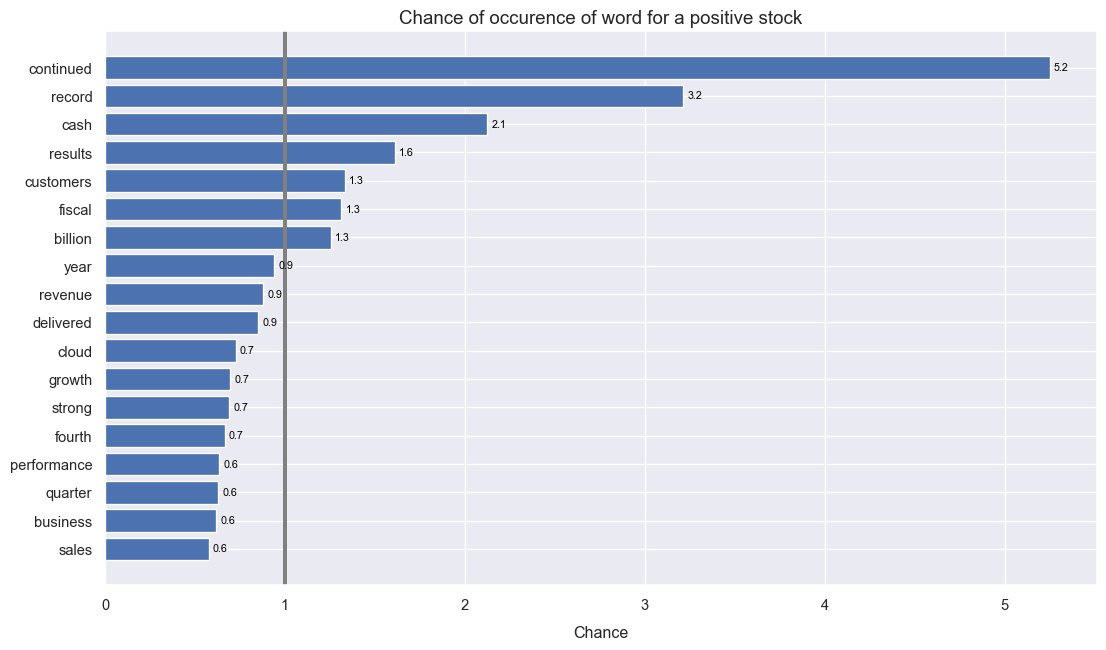

In [68]:
words = []
value = []
for i in difference_list_long:
    words.append(i[0])
    value.append(i[1])


fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)
bar1 = ax.barh(words, value)

ax.set_xlabel('Chance', fontsize=12, labelpad=10)

ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in value], padding=3, color='black', fontsize=8); 
plt.axvline(x=1, color = 'grey', linewidth=3)
plt.title('Chance of occurence of word for a positive stock', fontsize=14)



#plt.barh(words, value)
#plt.title('Chance of occurence of word for a positive stock', fontsize=14)
#plt.xlabel('Chance', fontsize=14)
#plt.ylabel('Word', fontsize=14)
#plt.xticks(rotation = 90)
#plt.grid(True)
#plt.show()

In [69]:
top_up_words_long

[('year', 189),
 ('growth', 146),
 ('strong', 94),
 ('$', 72),
 ('quarter', 63),
 ('customers', 56),
 ('fiscal', 46),
 ('record', 45),
 ('billion', 44),
 ('revenue', 44),
 ('performance', 40),
 ('business', 39),
 ('2020', 35),
 ('cash', 34),
 ('results', 29),
 ('2018', 27),
 ('cloud', 24),
 ('delivered', 23),
 ('2019', 23),
 ('fourth', 22),
 ('Q4', 21),
 ('continued', 21),
 ('2017', 20),
 ('sales', 19),
 ('2021', 19),
 ('term', 17),
 ('Honeywell', 17),
 ('long', 16),
 ('flow', 16),
 ('capital', 16),
 ('world', 16),
 ('new', 15),
 ('earnings', 15),
 ('Apple', 15),
 ('company', 15),
 ('Pfizer', 15),
 ('customer', 14),
 ('Affiliates', 14),
 ('continue', 13),
 ('said', 13),
 ('Microsoft', 13),
 ('product', 12),
 ('shareholders', 12),
 ('investments', 12),
 ('operating', 12),
 ('demand', 12),
 ('great', 11),
 ('AI', 11),
 ('products', 11),
 ('financial', 11),
 ('global', 11),
 ('pandemic', 11),
 ('NVIDIA', 11),
 ('challenging', 10),
 ('percent', 10),
 ('free', 10),
 ('digital', 10),
 ('serv

In [70]:
top_up_words_long.remove(('$', 72))
top_up_words_long.remove(('2020', 35))
top_up_words_long.remove(('2018', 27))
top_up_words_long.remove(('2019', 23))
top_up_words_long.remove(('Q4', 21))
top_up_words_long.remove(('fourth', 22))
top_up_words_long.remove(('2017', 20))
top_up_words_long.remove(('2021', 19))

In [71]:
words = []
value = []
for i in top_up_words_long[:25]:
    words.append(i[0])
    value.append(i[1])

words = words[::-1]
value = value[::-1]

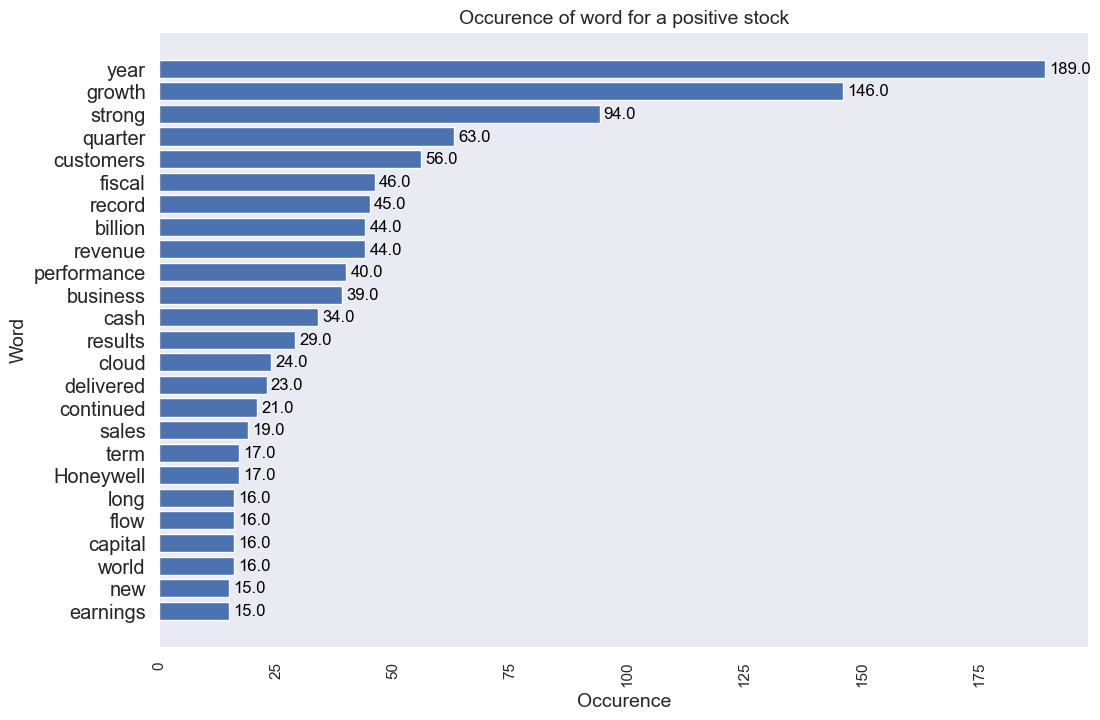

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
bar1 = ax.barh(words, value)

plt.title('Occurence of word for a positive stock', fontsize=14)
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in value], padding=3, color='black', fontsize=12)
ax.yaxis.set_tick_params(labelsize='large')
plt.xlabel('Occurence', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [73]:
top_down_words_long.remove(('$', 31))
top_down_words_long.remove(('2021', 16))
top_down_words_long.remove(('Q4', 12))
top_down_words_long.remove(('2017', 12))
top_down_words_long.remove(('2019', 12))
top_down_words_long.remove(('Prime', 14))
top_down_words_long.remove(('Oracle', 14))
top_down_words_long.remove(('NVIDIA', 10))
top_down_words_long.remove(('Amazon', 9))
top_down_words_long.remove(('Apple', 9))

In [74]:
top_down_words_long

[('growth', 100),
 ('year', 96),
 ('strong', 65),
 ('quarter', 48),
 ('performance', 30),
 ('business', 30),
 ('revenue', 24),
 ('customers', 20),
 ('fiscal', 17),
 ('billion', 17),
 ('fourth', 16),
 ('sales', 16),
 ('cloud', 16),
 ('businesses', 14),
 ('new', 13),
 ('delivered', 13),
 ('percent', 12),
 ('financial', 12),
 ('term', 10),
 ('U.S.', 10),
 ('results', 9),
 ('value', 9),
 ('like', 8),
 ('excellent', 8),
 ('cash', 8),
 ('investments', 8),
 ('outstanding', 7),
 ('record', 7),
 ('2018', 7),
 ('strategy', 7),
 ('company', 7),
 ('continue', 7),
 ('high', 7),
 ('products', 7),
 ('MySQL', 7),
 ('great', 6),
 ('product', 6),
 ('million', 6),
 ('delivering', 6),
 ('commercial', 6),
 ('2022', 6),
 ('making', 6),
 ('solid', 6),
 ('Disney+', 6),
 ('supply', 6),
 ('AI', 6),
 ('said', 6),
 ('NIKE', 6),
 ('EPS', 5),
 ('people', 5),
 ('drive', 5),
 ('Affiliates', 5),
 ('long', 5),
 ('momentum', 5),
 ('work', 5),
 ('flow', 5),
 ('grew', 5),
 ('good', 5),
 ('free', 5),
 ('applications', 5),


In [75]:
words = []
value = []
for i in top_down_words_long[:25]:
    words.append(i[0])
    value.append(i[1])

words = words[::-1]
value = value[::-1]

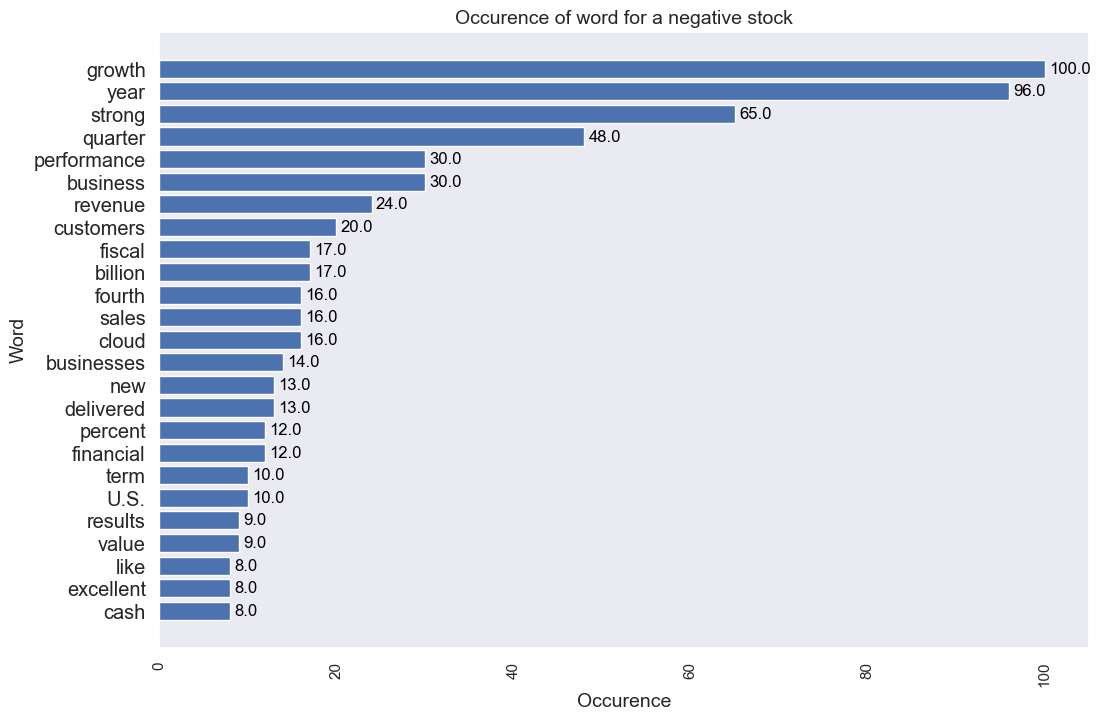

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
bar1 = ax.barh(words, value)

plt.title('Occurence of word for a negative stock', fontsize=14)
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in value], padding=3, color='black', fontsize=12)
ax.yaxis.set_tick_params(labelsize='large')
plt.xlabel('Occurence', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [77]:
result

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,stopword_count,readability dale_chall,readability flesch_reading_ease,noun_count,verb_count,adj_count,adv_count,pron_count,top_words,word_calculation
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,12.0,10.826444,51.835000,8.0,6.0,6.0,5.0,4.0,"[(2017, 1), (great, 1), (year, 1), (performed,...",1.450746
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,18.0,10.120095,29.122196,14.0,6.0,6.0,2.0,5.0,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo...",0.627955
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,6.0,11.506582,38.976889,5.0,6.0,4.0,1.0,2.0,"[(growth, 2), (focus, 1), (organic, 1), (drivi...",1.113614
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,15.0,13.393450,24.765068,12.0,6.0,5.0,0.0,3.0,"[(EPS, 2), (growth, 2), (Despite, 1), (challen...",0.222914
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,14.0,12.395333,37.641667,12.0,6.0,5.0,1.0,3.0,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,...",1.858078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,wallmart,2018-02-01,81.499840,307532700,We have good momentum in the business with sol...,-7.329239,-10.949623,2.993950,-8.992949,-13.435147,...,28.0,9.267909,45.257529,22.0,14.0,6.0,0.0,8.0,"[(business, 2), (making, 2), (work, 2), (custo...",0.256427
49,wallmart,2019-02-01,91.758194,166799500,"We had a good year, and I want to thank our as...",-16.516945,-18.641411,-11.757950,-18.000512,-20.315800,...,43.0,7.808479,51.719818,22.0,22.0,10.0,6.0,14.0,"[(want, 2), (work, 2), (customers, 2), (delive...",0.462493
61,wallmart,2020-02-01,101.834824,132414100,We thank our associates for another good year....,-33.246933,-31.088043,-12.444900,-32.647901,-30.527910,...,104.0,9.339411,47.452954,86.0,35.0,28.0,9.0,20.0,"[(strong, 5), (quarter, 5), (sales, 5), (U.S.,...",0.000344
73,wallmart,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,-11.647019,-20.448700,-11.773529,-9.323684,-16.369615,...,74.0,10.261401,46.919783,58.0,40.0,22.0,17.0,19.0,"[(strong, 4), (associates, 3), (customers, 3),...",0.420966


# Add word as features

In [78]:
result['continued']   = np.nan
result['record']      = np.nan
result['cash']        = np.nan
result['results']     = np.nan
result['customers']   = np.nan
result['fiscal']      = np.nan
result['billion']     = np.nan
result['cloud']       = np.nan
result['growth']      = np.nan
result['strong']      = np.nan
result['fourth']      = np.nan
result['performance'] = np.nan
result['quarter']     = np.nan
result['business']    = np.nan
result['sales']       = np.nan


for i in range(len(result["press release"])):
    count_continued = 0
    count_record = 0
    count_cash = 0
    count_results = 0
    count_customers = 0
    count_fiscal = 0
    count_billion = 0
    count_cloud = 0
    count_growth = 0
    count_strong = 0
    count_fourth = 0
    count_performance = 0
    count_quarter = 0
    count_business = 0
    count_sales = 0
    
    doc = nlp(result["press release"].iloc[i])
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    for j in words:
        if j == 'continued':
            count_continued += 1
        if j == 'record':
            count_record += 1
        if j == 'cash':
            count_cash += 1
        if j == 'results':
            count_results += 1
        if j == 'customers':
            count_customers += 1
        if j == 'fiscal':
            count_fiscal += 1
        if j == 'billion':
            count_billion += 1
        if j == 'cloud':
            count_cloud += 1
        if j == 'growth':
            count_growth += 1
        if j == 'strong':
            count_strong += 1
        if j == 'fourth':
            count_fourth += 1
        if j == 'performance':
            count_performance += 1
        if j == 'quarter':
            count_quarter += 1
        if j == 'business':
            count_business += 1
        if j == 'sales':
            count_sales += 1
            
    result['continued'].iloc[i]  = count_continued
    result['record'].iloc[i]     = count_record
    result['cash'].iloc[i]       = count_cash
    result['results'].iloc[i]    = count_results
    result['customers'].iloc[i]  = count_customers
    result['fiscal'].iloc[i]     = count_fiscal
    result['billion'].iloc[i]    = count_billion
    result['cloud'].iloc[i]      = count_cloud
    result['growth'].iloc[i]     = count_growth
    result['strong'].iloc[i]     = count_strong
    result['fourth'].iloc[i]     = count_fourth
    result['performance'].iloc[i]= count_performance
    result['quarter'].iloc[i]    = count_quarter
    result['business'].iloc[i]   = count_business
    result['sales'].iloc[i]      = count_sales    
        
        


In [79]:
result.head(20)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change pct 12mo,Price change pct 8mo,...,fiscal,billion,cloud,growth,strong,fourth,performance,quarter,business,sales
36,abbott,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,5.133094,-0.532227,-3.423134,9.051248,-0.938482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,abbott,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,12.457611,11.014770,6.456009,18.373164,16.245183,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
60,abbott,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,22.371323,4.783768,5.044571,27.182122,5.812484,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
72,abbott,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",4.067505,-6.490669,-2.903244,3.430524,-5.474215,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
84,abbott,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,-22.969223,-17.527900,-13.209739,-18.498073,-14.115948,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45,accenture,2018-10-01,146.758850,53970000,We are very pleased with our outstanding finan...,21.942078,18.630051,-2.482834,14.951111,12.694329,...,1.0,2.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0
57,accenture,2019-10-01,175.664246,42679200,“I am proud that we have delivered another yea...,17.778823,-19.729050,19.584030,10.120912,-11.231113,...,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
69,accenture,2020-10-01,208.875427,37834400,Accenture’s fiscal 2020 results demonstrate th...,65.676239,59.096283,24.995819,31.442779,28.292597,...,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0
81,accenture,2021-10-01,350.100861,35413000,We are very proud of our outstanding fiscal 20...,-56.375000,-19.205262,-4.059540,-16.102503,-5.485637,...,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
93,accenture,2022-10-01,280.390594,46327800,Our exceptional performance in fiscal 2022 is ...,25.529419,4.301453,-3.564453,9.104948,1.534093,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


# top words for short sign

In [80]:
#top_up_words_short = {}
#for i in result[result['Price change sign short'] == 1]['top_words']:
#    for j in i:
#        if j[0] in top_up_words_short:
#            top_up_words_short[j[0]] += j[1]
#        else:
#            top_up_words_short[j[0]] = j[1]
#            
#top_up_words_short = sorted(top_up_words_short.items(), key=lambda x:x[1], reverse=True)
#print(top_up_words_short)

In [81]:
#top_down_words_short = {}
#for i in result[result['Price change sign short'] == -1]['top_words']:
#    for j in i:
#        if j[0] in top_down_words_short:
#            top_down_words_short[j[0]] += j[1]
#        else:
#            top_down_words_short[j[0]] = j[1]
#            
#top_down_words_short = sorted(top_down_words_short.items(), key=lambda x:x[1], reverse=True)
#
##normalize 116 postive and 27 negative = 168/80 = 2.1
#top_down_words_short_new = []
#for key, value in top_down_words_short:
#    value = value * 2.1
#    top_down_words_short_new.append(tuple([key, int(value)])) 
#
#print(top_down_words_short_new)

In [82]:
#top_down_words_short_dict = {}
#
#for i in top_down_words_short_new:
#    if i[0] in top_down_words_short_dict:
#        top_down_words_short_dict[i[0]] += i[1]
#    else:
#        top_down_words_short_dict[i[0]] = i[1]

In [83]:
# difference between list where the number followed by the word is the times it occurs more in POSTIVE 1
#difference_list_short = []
#for i in top_up_words_short[:25]:
#    if i[0] in top_down_words_short_dict:
#        difference = i[1] / top_down_words_short_dict[i[0]]
#        difference_list_short.append(tuple([i[0], difference]))

In [84]:
#difference_list_short

In [85]:
#result

In [86]:
#data = result

In [87]:
#result.dropna(subset=['press release'], inplace=True)

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt 

import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change pct 12mo', 'Price change pct 8mo', 'Price change pct 4mo',
       'Price change sign 12mo', 'Price change sign 8mo',
       'Price change sign 4mo', 'Compound', 'Negative', 'Neutral', 'Positive',
       'polarity', 'subjectivity', 'text length', 'word_count', 'word_density',
       'punctuation_count', 'upper_case_word_count', 'stopword_count',
       'readability dale_chall', 'readability flesch_reading_ease',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'top_words', 'word_calculation', 'continued', 'record', 'cash',
       'results', 'customers', 'fiscal', 'billion', 'cloud', 'growth',
       'strong', 'fourth', 'performance', 'quarter', 'business', 'sales'],
      dtype='object')

In [90]:
#X = np.array(result[['Negative', 'Neutral', 'Positive', 'polarity', 'subjectivity', 
#                     'text length', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 
#                     'stopword_count', 'readability dale_chall', 'readability flesch_reading_ease', 'noun_count', 'verb_count',
#                     'adj_count', 'adv_count', 'pron_count', 'continued', 'record', 
#                     'cash', 'results', 'customers', 'fiscal', 'billion', 
#                     'cloud', 'growth', 'strong', 'fourth', 'performance',
#                     'quarter', 'business', 'sales'
#                    ]])
X = result[['Negative', 'Neutral', 'Positive', 'polarity', 'subjectivity', 
                     'text length', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 
                     'stopword_count', 'readability dale_chall', 'readability flesch_reading_ease', 'noun_count', 'verb_count',
                     'adj_count', 'adv_count', 'pron_count', 'continued', 'record', 
                     'cash', 'results', 'customers', 'fiscal', 'billion', 
                     'cloud', 'growth', 'strong', 'fourth', 'performance',
                     'quarter', 'business', 'sales'
                    ]]

                    
#y = np.array(result['Price change sign long'])
y = result['Price change sign 12mo']
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  shuffle=True)

print(f"Train data shapes X:{X_train.shape} , y:{y_train.shape}")
print(f"Test data shapes X:{X_test.shape} , y:{y_test.shape}")

Train data shapes X:(173, 33) , y:(173,)
Test data shapes X:(75, 33) , y:(75,)


In [91]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro') }

# Logistic regression

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg
Mean accs :  0.5672268907563025
Mean f1_macro 0.4704158986192518
Mean precision 0.6553284072249589
Mean recall 0.4795783926218708


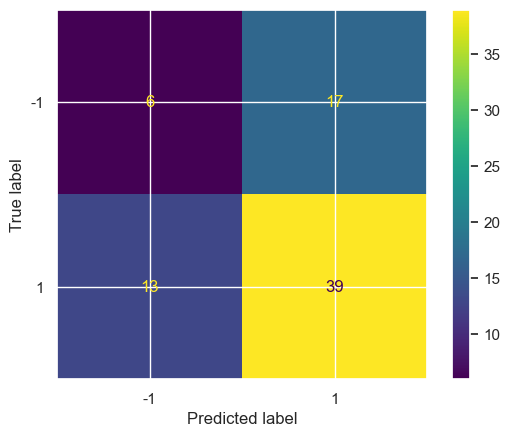

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.6070588235294118
Mean f1_macro 0.49369952898254776
Mean precision 0.6769824561403508
Mean recall 0.5115447957839262


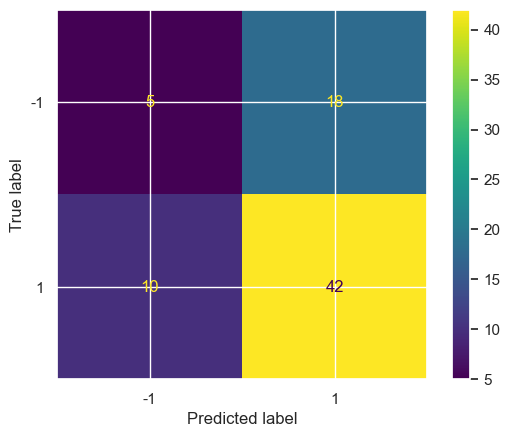

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.5729411764705883
Mean f1_macro 0.473825339933411
Mean precision 0.6589950738916256
Mean recall 0.48392621870882735


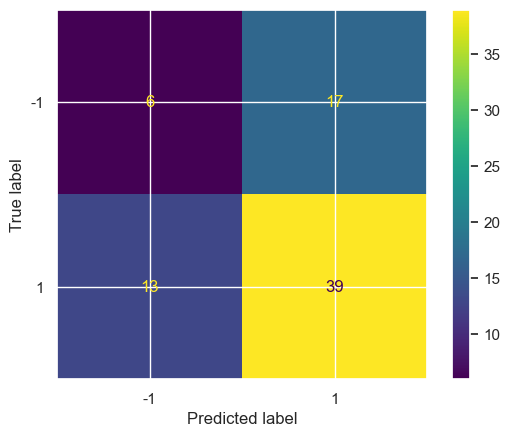

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.6589915966386555
Mean f1_macro 0.3972042174401521
Mean precision 0.6667787114845939
Mean recall 0.49148550724637685


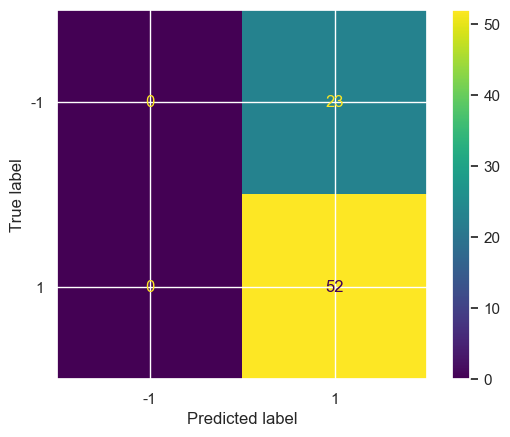

In [92]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    #logisticRegr.predict(X_test[0].reshape(1,-1))
    logisticRegr.predict(X_test)
    
    cv_scores = cross_validate(logisticRegr, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

In [93]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy on test set : ",score)


Accuracy on test set :  0.6


In [94]:
predictions = logisticRegr.predict(X_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
f1 = f1_score(y_test, predictions)
print("F1 Score on Test set for 'optimal' random forest:", f1)
precision = precision_score(y_test, predictions)
print("Precision on Test set for 'optimal' random forest:", precision)
recall = recall_score(y_test, predictions)
print("Recall on Test set for 'optimal' random forest:", recall)

Accuracy on Test set for 'optimal' random forest is : 0.6
F1 Score on Test set for 'optimal' random forest: 0.7222222222222223
Precision on Test set for 'optimal' random forest: 0.6964285714285714
Recall on Test set for 'optimal' random forest: 0.75


In [95]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

0.5883597883597883

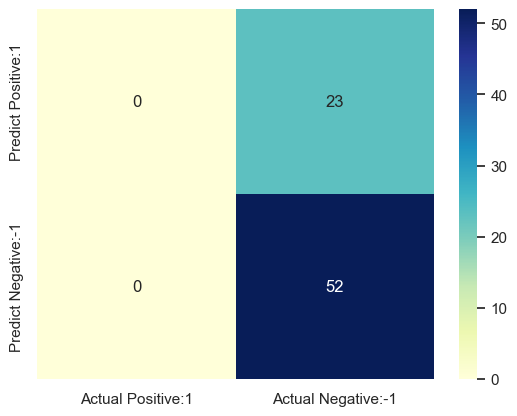

In [96]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.32      0.26      0.29        23
           1       0.70      0.75      0.72        52

    accuracy                           0.60        75
   macro avg       0.51      0.51      0.50        75
weighted avg       0.58      0.60      0.59        75



In [98]:
coefficients = logisticRegr.coef_[0]

coefficients

array([ 0.03506562, -0.28929132,  0.21980478,  0.74856332,  0.57259123,
        0.01460168, -0.17903144, -0.28289933, -0.09223583, -0.02534048,
        0.19540346,  0.2090093 ,  0.00634778,  0.03159191,  0.09115768,
        0.06547452,  0.03831837, -0.16529248,  0.08834522,  0.74777787,
        0.85189385, -0.04633431,  0.41717854, -0.05904114,  0.38194291,
        0.44473149, -0.19659787, -0.07714516,  0.64860378, -0.40386603,
       -0.64363287, -0.12236455, -0.68572941])

In [99]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6933


In [100]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3067


In [101]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


In [102]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


In [103]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : nan


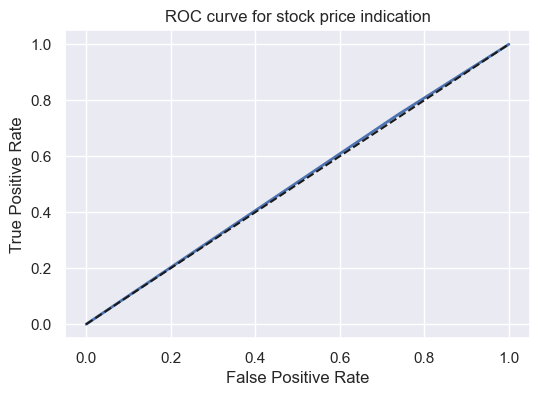

In [104]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for stock price indication')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [105]:
words = ['Negative', 'Neutral', 'Positive', 'polarity', 'subjectivity', 
                     'text length', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 
                     'stopword_count', 'readability dale_chall', 'readability flesch_reading_ease', 'noun_count', 'verb_count',
                     'adj_count', 'adv_count', 'pron_count', 'continued', 'record', 
                     'cash', 'results', 'customers', 'fiscal', 'billion', 
                     'cloud', 'growth', 'strong', 'fourth', 'performance',
                     'quarter', 'business', 'sales']

In [106]:
asdf = list(zip(words, coefficients))

sorted_by_second = sorted(asdf, key=lambda tup: tup[1], reverse=True)

words, coefficients = zip(*sorted_by_second)

Text(0, 0.5, 'Feature')

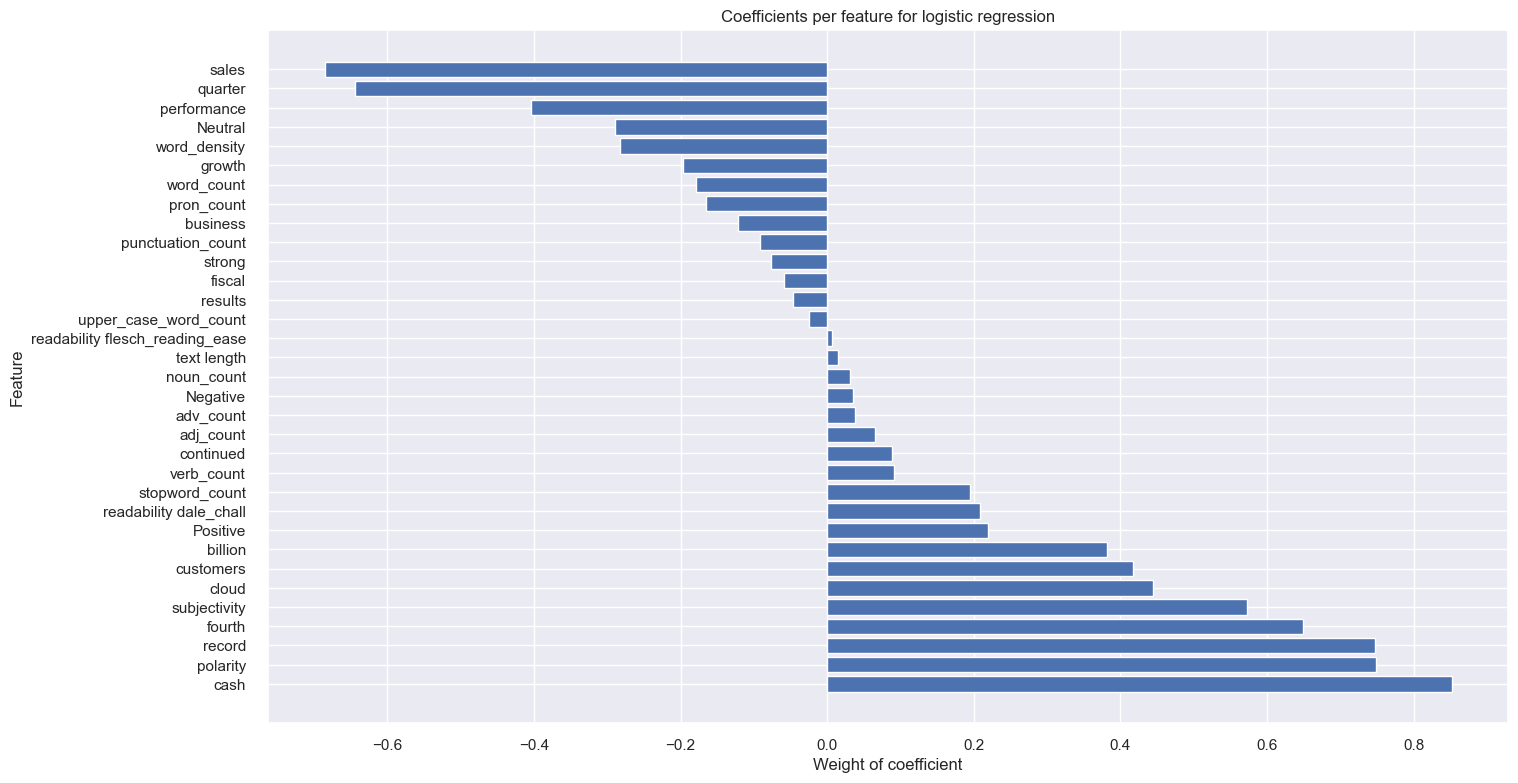

In [107]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(words, coefficients)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_title('Coefficients per feature for logistic regression',
             loc ='center', )
plt.xlabel("Weight of coefficient")
plt.ylabel("Feature")

In [108]:
coefficients

(0.8518938500825955,
 0.7485633227619684,
 0.7477778735763503,
 0.6486037823986799,
 0.5725912347760529,
 0.44473149203253504,
 0.41717854490940126,
 0.38194291487029947,
 0.21980477822853692,
 0.2090092986682446,
 0.19540345639744203,
 0.09115767525412309,
 0.0883452210400085,
 0.06547451602568201,
 0.03831836887978977,
 0.035065621500815644,
 0.03159191310064772,
 0.014601682566855437,
 0.006347779940661716,
 -0.025340483654800745,
 -0.04633431205958515,
 -0.059041140498679236,
 -0.0771451629183749,
 -0.09223582780035969,
 -0.12236454517429916,
 -0.16529247534647618,
 -0.17903143853613418,
 -0.1965978661481262,
 -0.2828993270848388,
 -0.28929131827325066,
 -0.4038660313996268,
 -0.6436328667382458,
 -0.6857294082648843)

# K nearest neighbours

In [109]:
#for k in [2, 5 ,10]:
#    print("---------"*10)
#    print("Training with k = ",k)
#    knn = KNeighborsClassifier(n_neighbors = k)
#    knn.fit(X_train, y_train)
#
#    # Cross 5 fold validation
#    cv_scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
#    accs = cv_scores['test_accuracy'].mean()
#    print("Mean accs : ",accs)
#    f1_macros = cv_scores['test_f1_macro'].mean()
#    print("Mean f1_macro", f1_macros)
#    prec = cv_scores['test_precision'].mean()
#    print("Mean precision", prec)
#    recall = cv_scores['test_recall'].mean()
#    print("Mean recall", recall)
#
#    # cONFUSION matrix
#    predictions = knn.predict(X_test)
#    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
#    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                             display_labels=knn.classes_)
#    disp.plot()
#    plt.show()

In [110]:
#knn = KNeighborsClassifier(n_neighbors = 5)
#knn.fit(X_train, y_train)
## Use score method to get accuracy of model
#score = knn.score(X_test, y_test)
#print("Accuracy on test set : ",score)

In [111]:
#for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
#    print("---------"*10)
#    print("Training SVM with kernel ", kernel)
#    clf = svm.SVC(kernel=kernel)
#    clf.fit(X_train, y_train)
#    
#     # Cross 5 fold validation
#    cv_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
#    accs = cv_scores['test_accuracy'].mean()
#    print("Mean accs : ",accs)
#    f1_macros = cv_scores['test_f1_macro'].mean()
#    print("Mean f1_macro", f1_macros)
#    prec = cv_scores['test_precision'].mean()
#    print("Mean precision", prec)
#    recall = cv_scores['test_recall'].mean()
#    print("Mean recall", recall)
#
#    # cONFUSION matrix
#    predictions = clf.predict(X_test)
#    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
#    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                             display_labels=clf.classes_)
#    disp.plot()
#    plt.show()

In [112]:
#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train)
#clf.predict(X_test)
#print(f'Kernel: rbf, score: {clf.score(X_test, y_test)}')

# Decision tree

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.6365714285714286
Mean f1_macro 0.4089935064935065
Mean precision 0.6671876208897485
Mean recall 0.4825757575757576


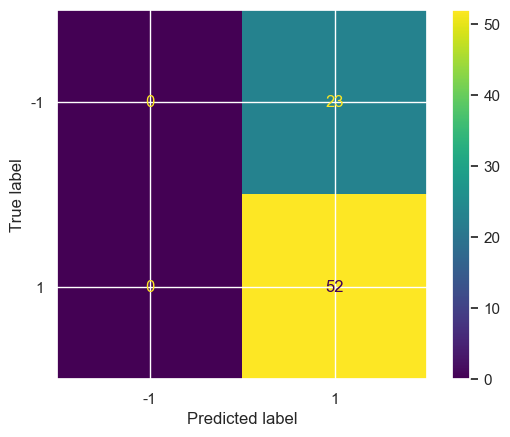

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.6285714285714286
Mean f1_macro 0.41554112554112554
Mean precision 0.6659702295854008
Mean recall 0.48000222816399285


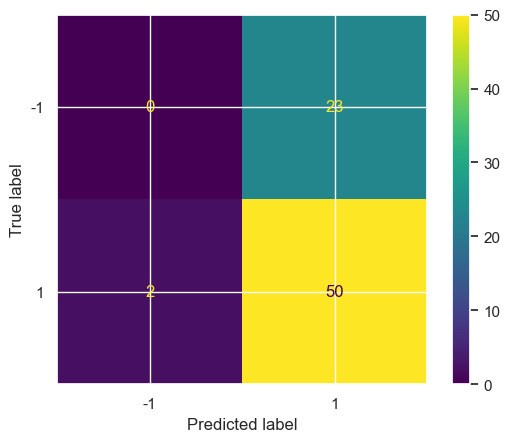

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.6125714285714285
Mean f1_macro 0.4296662566823858
Mean precision 0.6694207138854815
Mean recall 0.48120543672014254


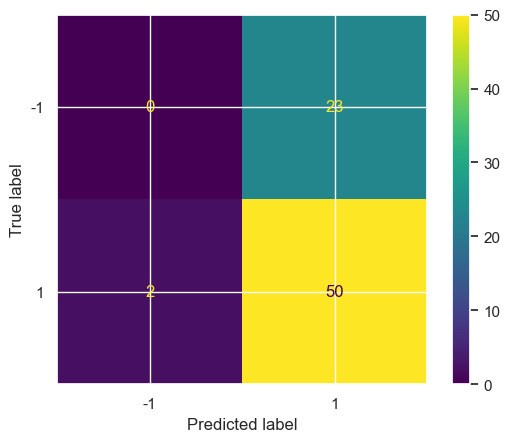

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 7
Mean accs :  0.6085714285714285
Mean f1_macro 0.438285833170467
Mean precision 0.6693350902068346
Mean recall 0.4815730837789661


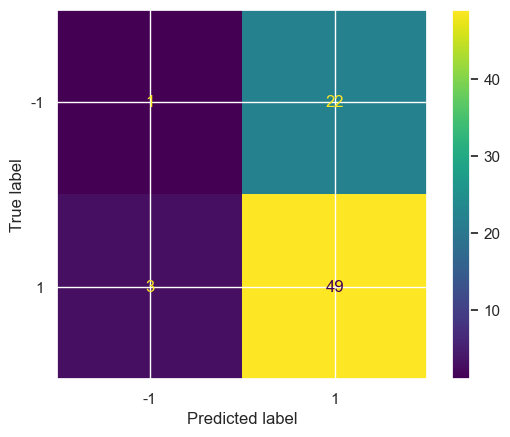

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.5884897959183674
Mean f1_macro 0.43647347844612916
Mean precision 0.6633358117075561
Mean recall 0.46999777183600705


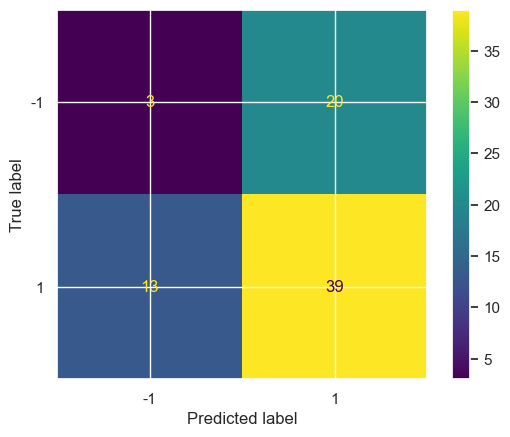

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.6165714285714285
Mean f1_macro 0.4200619212011617
Mean precision 0.663303562918734
Mean recall 0.4744875222816399


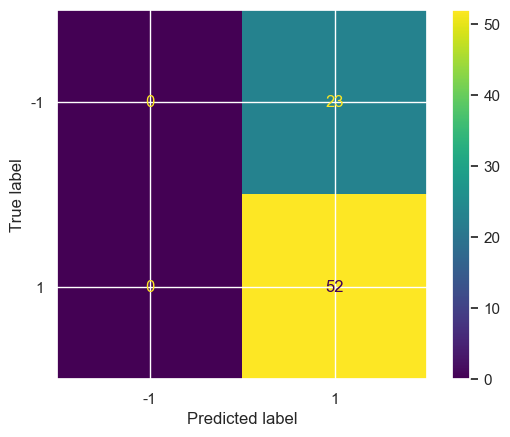

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.5798367346938775
Mean f1_macro 0.4244652539688255
Mean precision 0.6521813073055309
Mean recall 0.4634024064171123


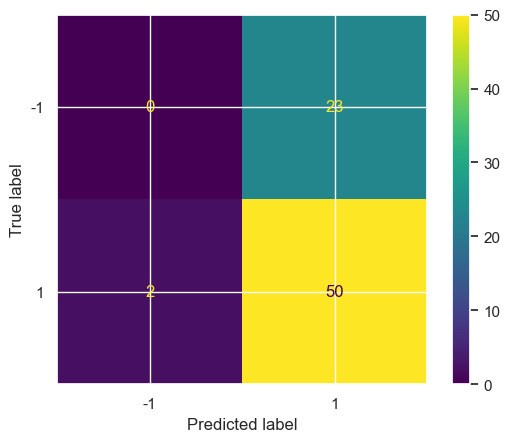

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.5880816326530611
Mean f1_macro 0.4370884092059105
Mean precision 0.6576721716661049
Mean recall 0.4729500891265597


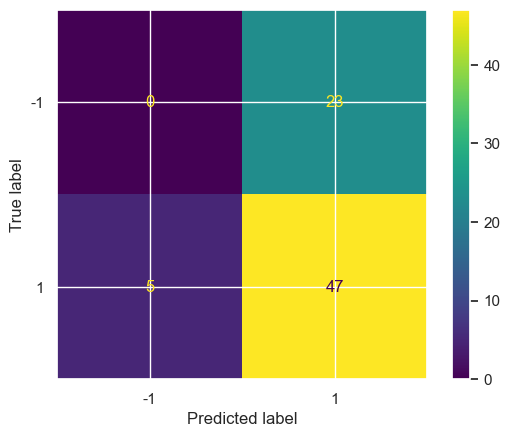

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 7
Mean accs :  0.5720816326530612
Mean f1_macro 0.45015262515262516
Mean precision 0.6588986960154009
Mean recall 0.47442067736185384


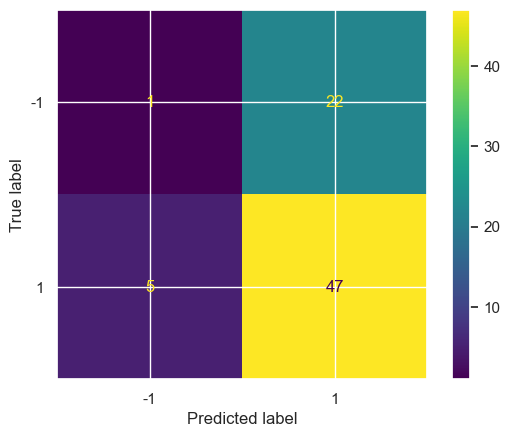

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.5478367346938776
Mean f1_macro 0.4398550081458662
Mean precision 0.6477833564790088
Mean recall 0.45641711229946524


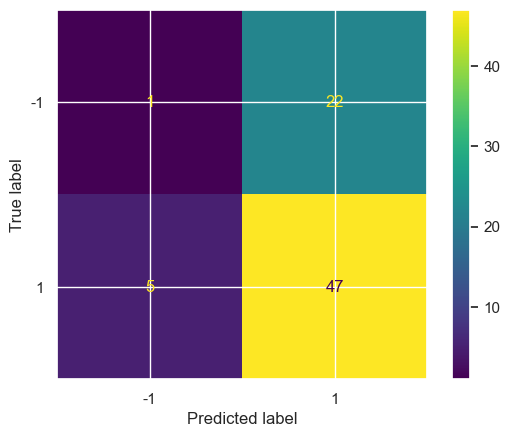

In [113]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 7, 10] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

Accuracy on Test set for 'optimal' random forest is : 0.64
F1 Score on Test set for 'optimal' random forest: 0.7768595041322315
Precision on Test set for 'optimal' random forest: 0.6811594202898551
Recall on Test set for 'optimal' random forest: 0.9038461538461539


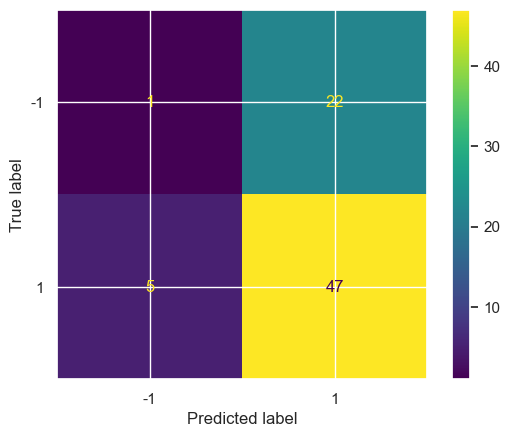

In [114]:
rf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
predictions = rf.predict(X_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
f1 = f1_score(y_test, predictions)
print("F1 Score on Test set for 'optimal' random forest:", f1)
precision = precision_score(y_test, predictions)
print("Precision on Test set for 'optimal' random forest:", precision)
recall = recall_score(y_test, predictions)
print("Recall on Test set for 'optimal' random forest:", recall)
# CONFUSION matrix
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()

Text(0.5, 1.0, 'Confusion matrix of random forest')

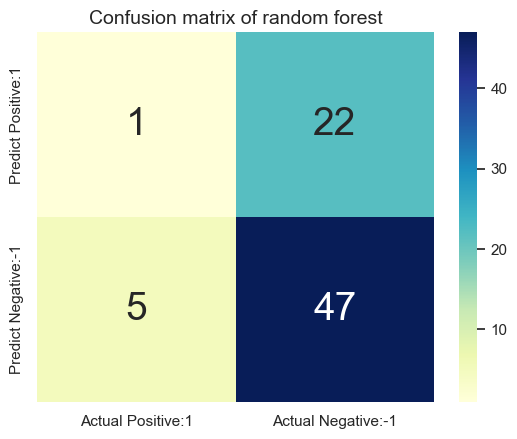

In [115]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', annot_kws={'size': 28});
plt.title('Confusion matrix of random forest', fontsize = 14)

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.17      0.04      0.07        23
           1       0.68      0.90      0.78        52

    accuracy                           0.64        75
   macro avg       0.42      0.47      0.42        75
weighted avg       0.52      0.64      0.56        75



In [117]:
rf.feature_importances_

array([0.        , 0.        , 0.        , 0.31196431, 0.07096436,
       0.        , 0.        , 0.10942257, 0.13232862, 0.        ,
       0.        , 0.28300269, 0.        , 0.09231745, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

[Text(0.34615384615384615, 0.9166666666666666, 'x[5] <= 471.5\ngini = 0.425\nsamples = 75\nvalue = [23, 52]'),
 Text(0.15384615384615385, 0.75, 'x[14] <= 6.5\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[7] <= 5.766\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5384615384615384, 0.75, 'x[2] <= 0.129\ngini = 0.35\nsamples = 62\nvalue = [14, 48]'),
 Text(0.46153846153846156, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[27] <= 2.5\ngini = 0.285\nsamples = 58\nvalue = [10, 48]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[29] <= 3.0\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.384

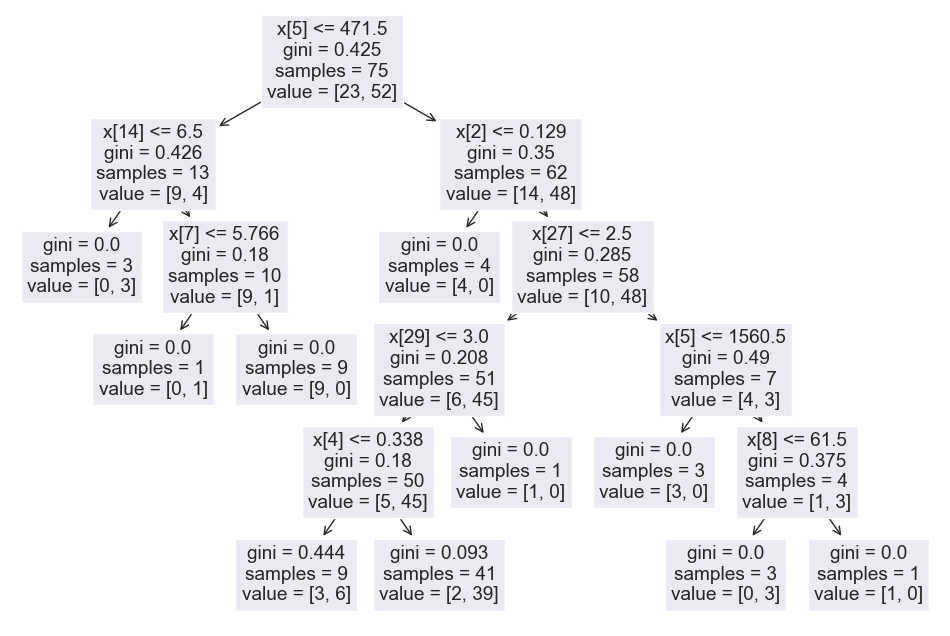

In [118]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(rf.fit(X_test, y_test)) 

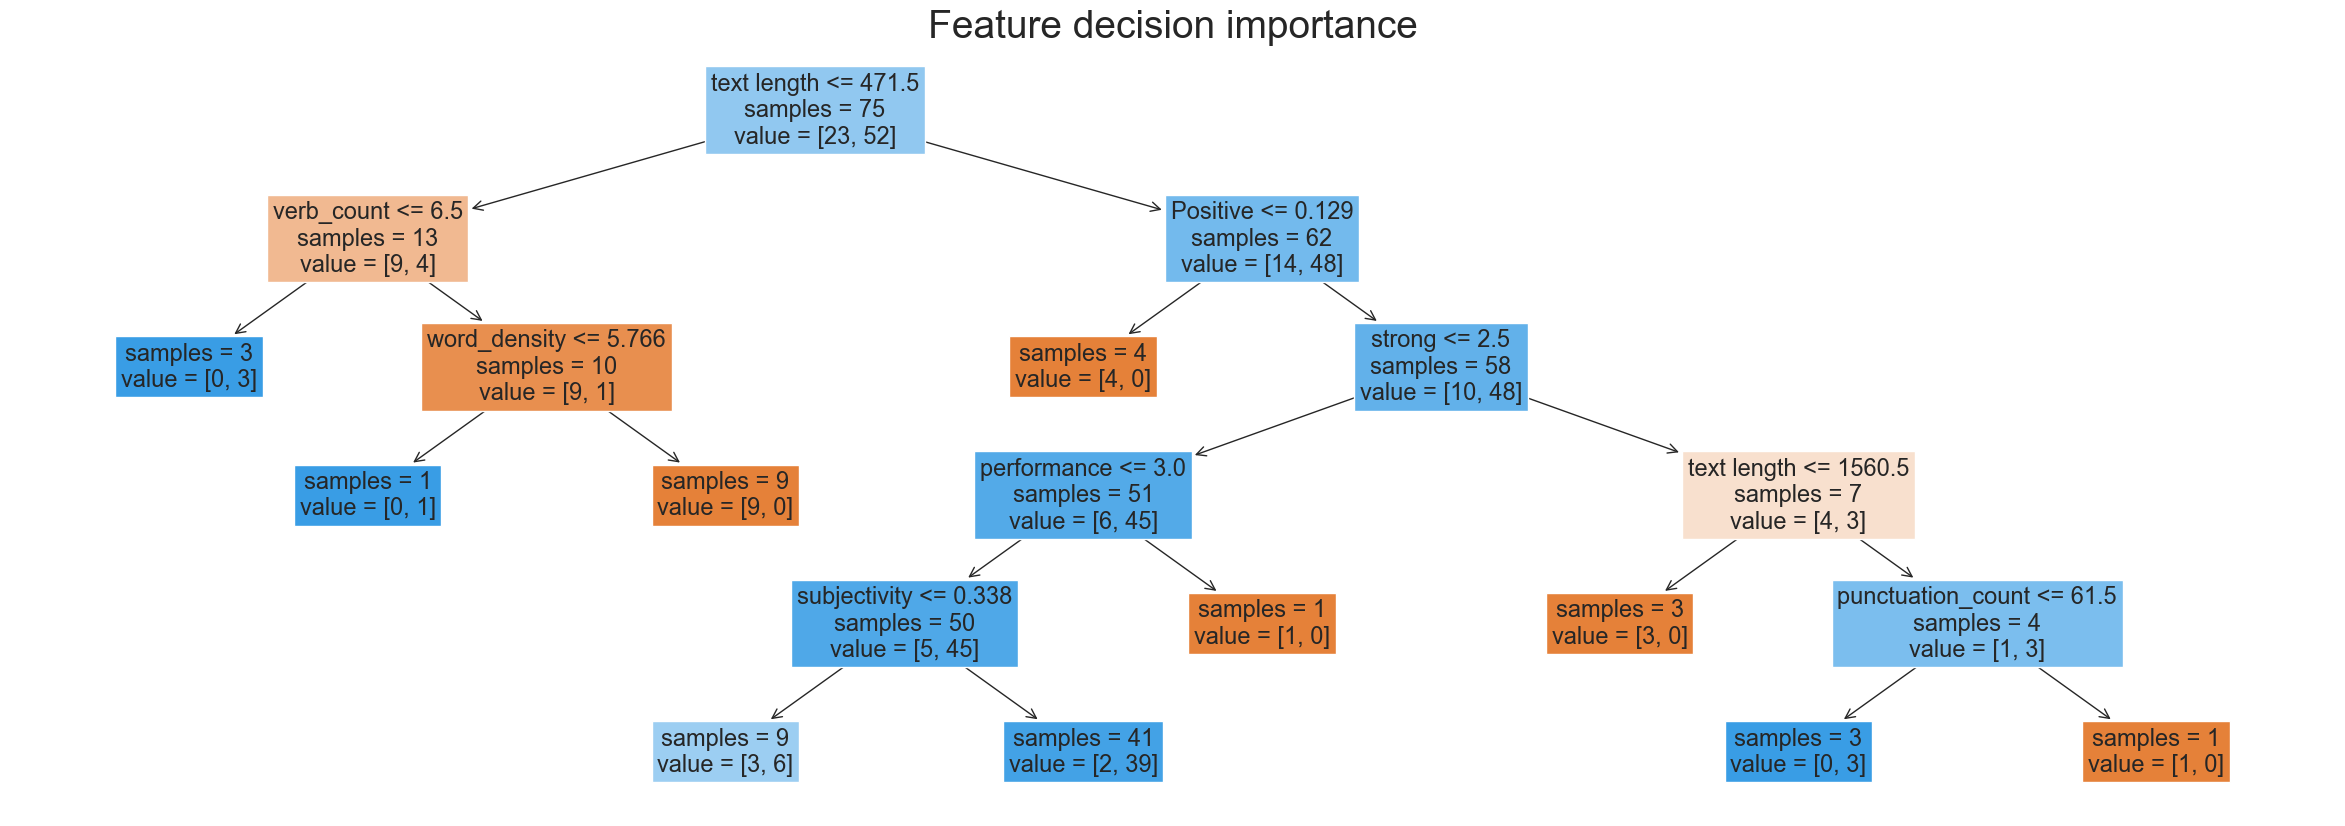

In [119]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    rf,
    feature_names=['Negative', 'Neutral', 'Positive', 'polarity', 'subjectivity', 
                     'text length', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 
                     'stopword_count', 'readability dale_chall', 'readability flesch_reading_ease', 'noun_count', 'verb_count',
                     'adj_count', 'adv_count', 'pron_count', 'continued', 'record', 
                     'cash', 'results', 'customers', 'fiscal', 'billion', 
                     'cloud', 'growth', 'strong', 'fourth', 'performance',
                     'quarter', 'business', 'sales'
                    ],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.title('Feature decision importance', fontsize = 28)
plt.show()

In [120]:
y_test.value_counts()

 1    52
-1    23
Name: Price change sign 12mo, dtype: int64

In [121]:
result.to_csv('result dataset.csv')

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train);

y_pred = classifier.predict(X_test)

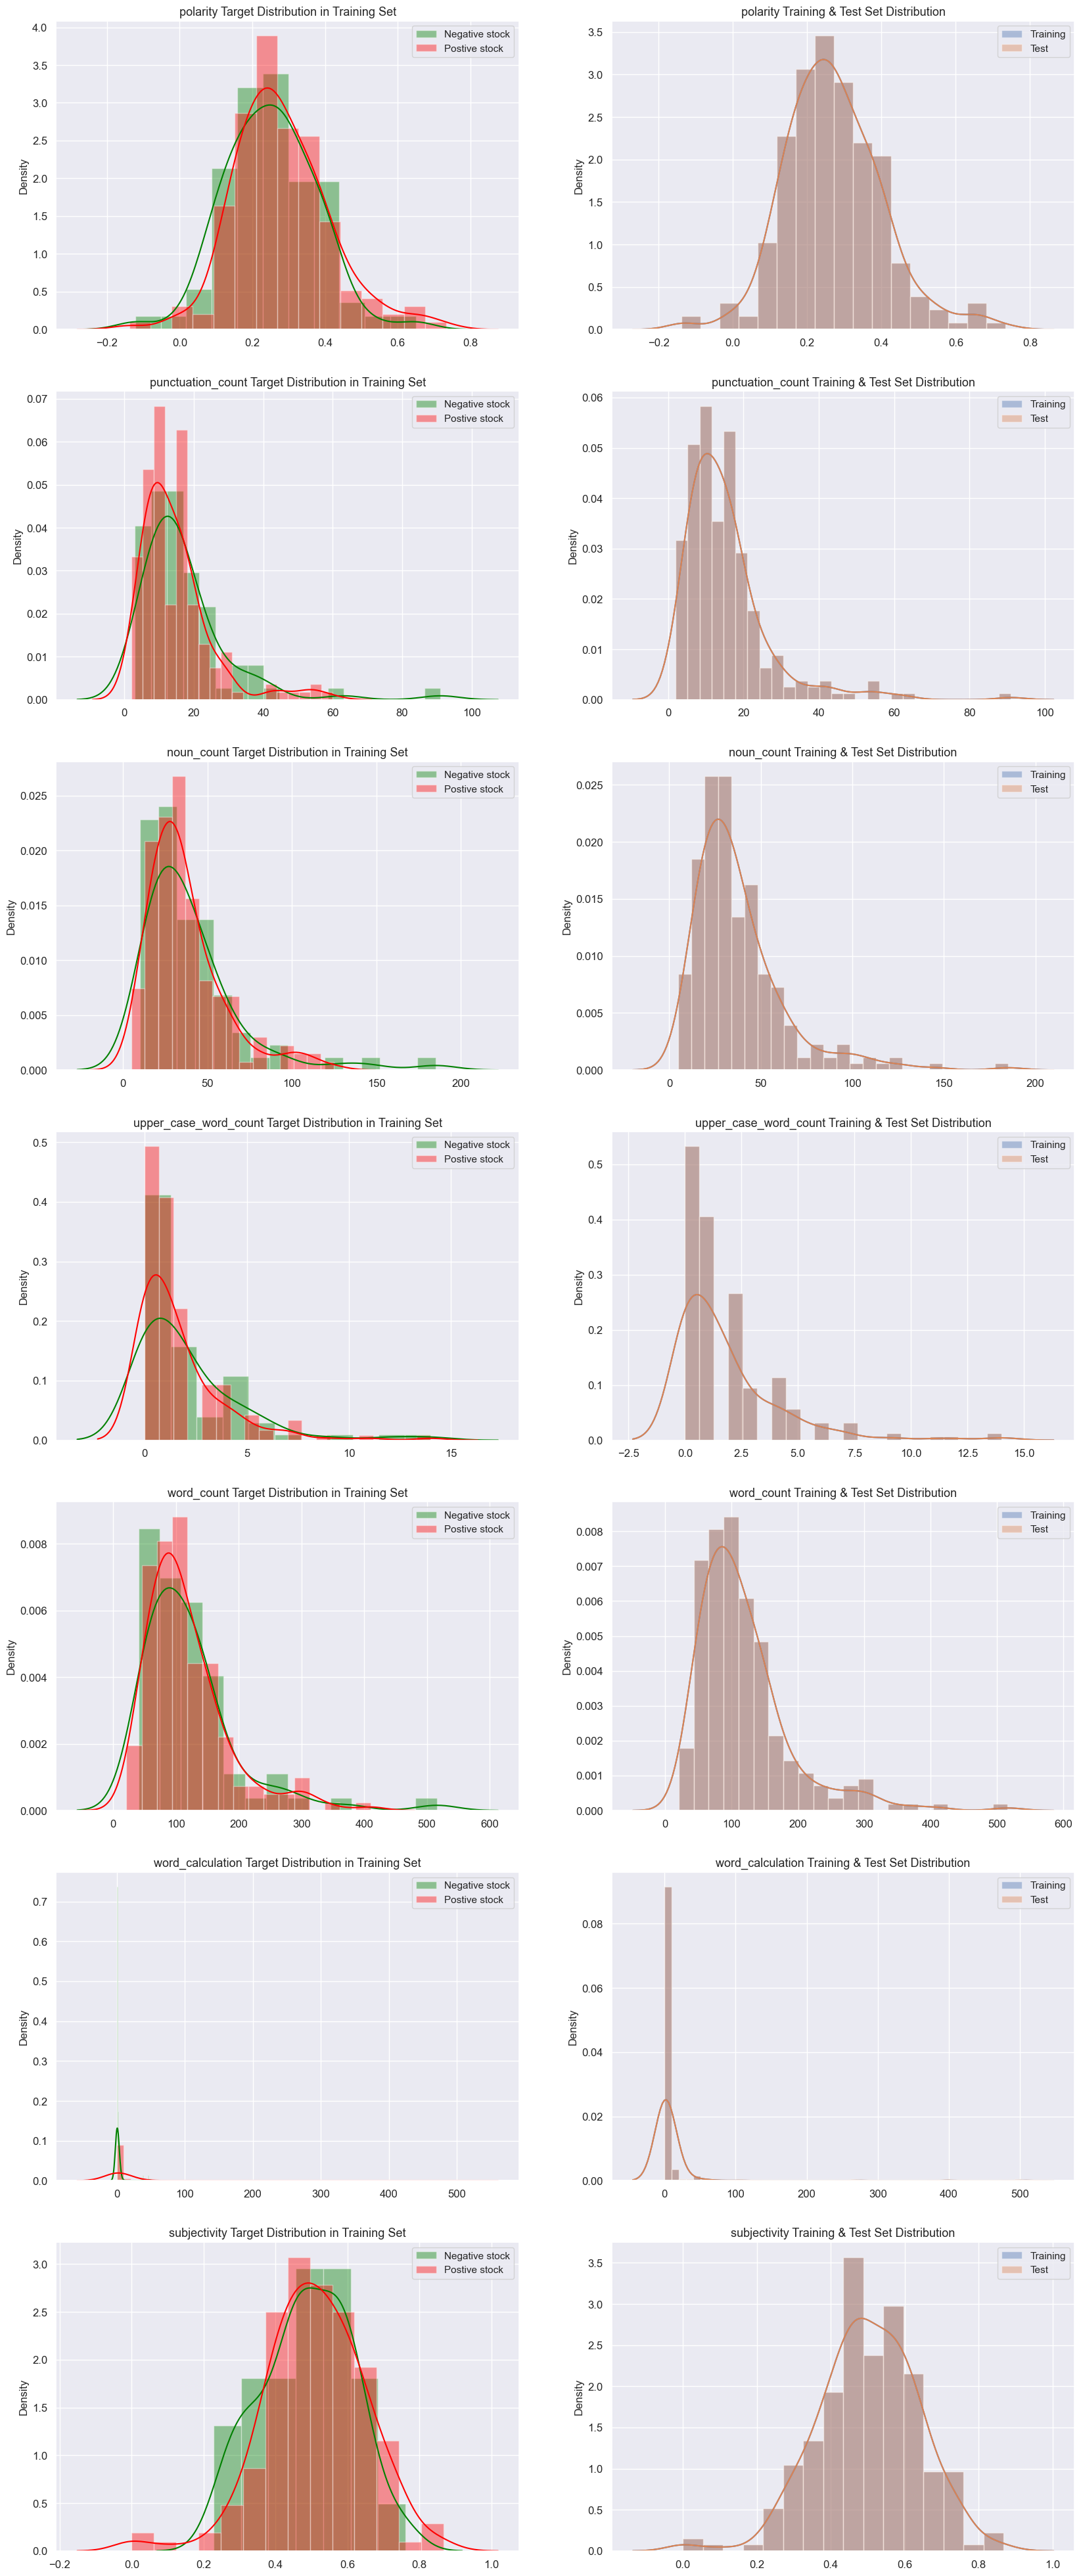

In [123]:
METAFEATURES = ['polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'word_count', 'word_calculation', 
                    'subjectivity']
DISASTER_TWEETS = result['Price change sign 12mo'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(result.loc[~DISASTER_TWEETS][feature], label='Negative stock', ax=axes[i][0], color='green')
    sns.distplot(result.loc[DISASTER_TWEETS][feature], label='Postive stock', ax=axes[i][0], color='red')

    sns.distplot(result[feature], label='Training', ax=axes[i][1])
    sns.distplot(result[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


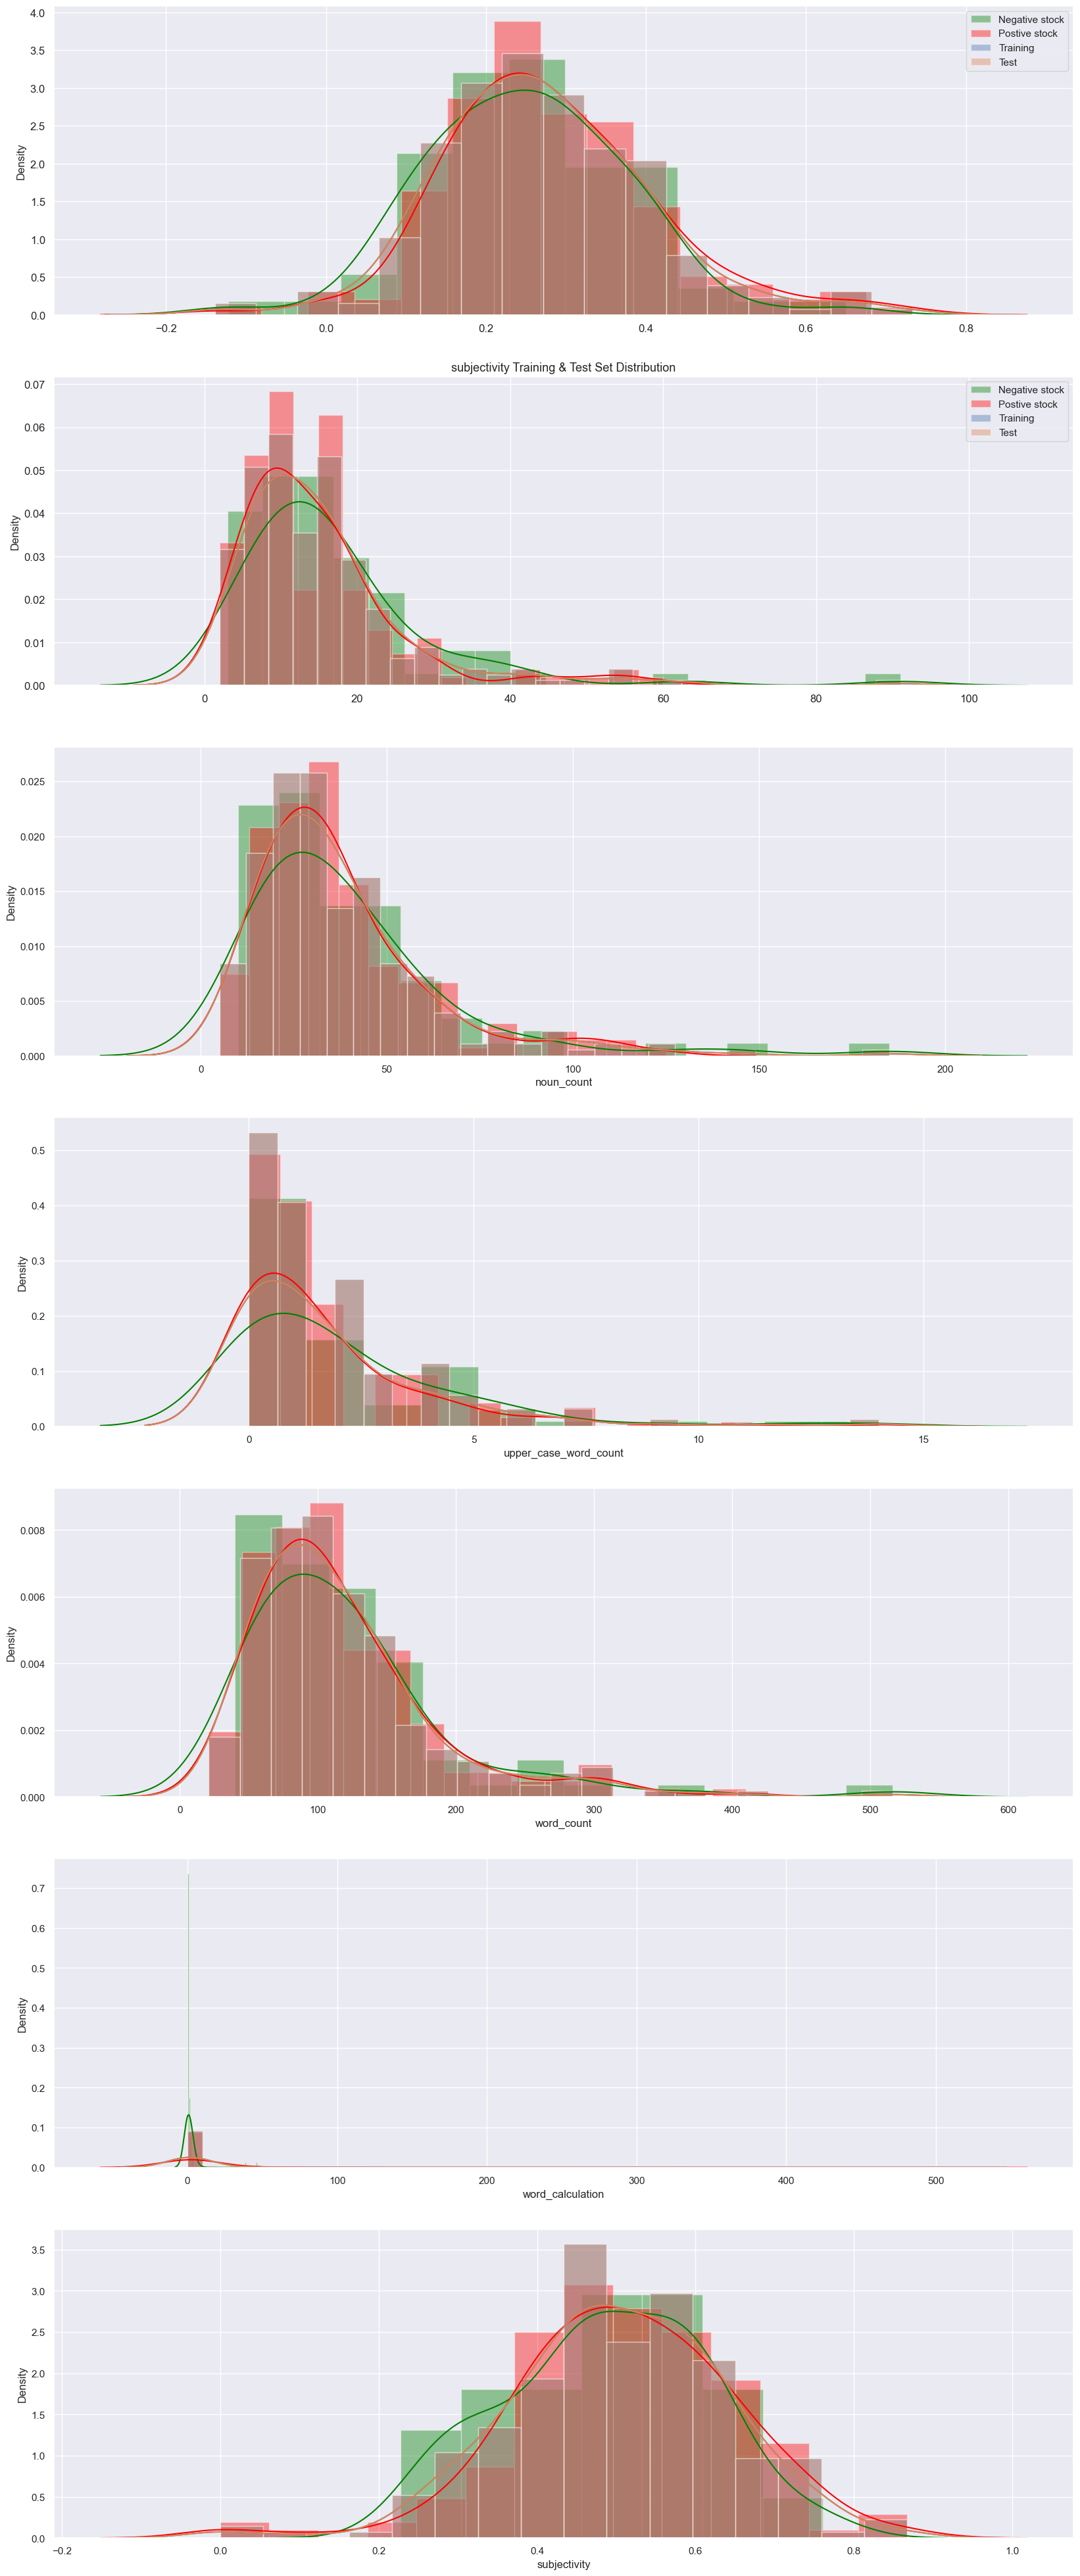

In [124]:
METAFEATURES = ['polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'word_count', 'word_calculation', 
                    'subjectivity']
DISASTER_TWEETS = result['Price change sign 12mo'] == 1

fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(result.loc[~DISASTER_TWEETS][feature], label='Negative stock', ax=axes[i], color='green')
    sns.distplot(result.loc[DISASTER_TWEETS][feature], label='Postive stock', ax=axes[i], color='red')

    sns.distplot(result[feature], label='Training', ax=axes[i])
    sns.distplot(result[feature], label='Test', ax=axes[i])
    
    for j in range(2):
        axes[j].set_xlabel('')
        axes[j].tick_params(axis='x', labelsize=12)
        axes[j].tick_params(axis='y', labelsize=12)
        axes[j].legend()
    
    axes[j].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[j].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [125]:
#from matplotlib.colors import ListedColormap
#from sklearn.decomposition import PCA
#
# Assuming 'X_test' is a NumPy array with your 33 features
#
## Apply PCA to reduce the dimensionality to 2 components
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_test)
#
## Select the indices of any two principal components for visualization (e.g., 0 and 1)
#component1_index = 0
#component2_index = 1
#
## Convert selected components to NumPy arrays
#X_component1 = X_pca[:, component1_index]
#X_component2 = X_pca[:, component2_index]
#
## Create meshgrid using the two selected principal components
#X1, X2 = np.meshgrid(np.arange(start=X_component1.min() - 10, stop=X_component1.max() + 10, step=0.25),
#                     np.arange(start=X_component2.min() - 1000, stop=X_component2.max() + 1000, step=0.25))
#
## Transform the meshgrid points using the inverse transform of the PCA
#X_grid = np.array([X1.ravel(), X2.ravel()]).T
#X_grid_transformed = pca.inverse_transform(X_grid)
#
## Predict the labels for the meshgrid points
#y_pred = classifier.predict(X_grid_transformed)
#
## Reshape the predictions to match the shape of the meshgrid
#y_pred = y_pred.reshape(X1.shape)
#
## Plot the decision boundaries
#plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#
## Plot the actual data points
#for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_component1[y_set == j], X_component2[y_set == j], c=ListedColormap(('red', 'green'))(i), label=str(j))
#
#plt.title('Decision Tree Classification (Test set)')
#plt.xlabel(f'Principal Component {component1_index}')
#plt.ylabel(f'Principal Component {component2_index}')
#plt.legend()
#plt.show()
#

In [126]:
corrmat['Price change sign 12mo'].sort_values(ascending=False)

Price change sign 12mo             1.000000
polarity                           0.112370
subjectivity                       0.073096
readability dale_chall             0.067518
Positive                           0.062566
Negative                           0.046865
word_density                       0.028198
verb_count                         0.001317
stopword_count                    -0.004614
Compound                          -0.006527
pron_count                        -0.006699
Adj Close                         -0.018493
Volume                            -0.020415
text length                       -0.027876
word_count                        -0.030271
adj_count                         -0.037865
adv_count                         -0.053197
noun_count                        -0.054630
Neutral                           -0.080419
upper_case_word_count             -0.092310
readability flesch_reading_ease   -0.095622
punctuation_count                 -0.095700
Name: Price change sign 12mo, dt

In [127]:
corrmat = result.corr()

In [128]:
corrmat['Price change sign 12mo'].sort_values(ascending=False)

Price change sign 12mo             1.000000
Price change pct 12mo              0.728080
Price change sign 8mo              0.620387
Price change pct 8mo               0.593145
Price change pct 4mo               0.533365
Price change sign 4mo              0.521182
Price change 12mo                  0.499222
Price change 8mo                   0.358847
Price change 4mo                   0.287839
record                             0.137494
continued                          0.123983
polarity                           0.112370
word_calculation                   0.094890
subjectivity                       0.073096
readability dale_chall             0.067518
cash                               0.064115
Positive                           0.062566
results                            0.048325
Negative                           0.046865
customers                          0.039900
word_density                       0.028198
fiscal                             0.025040
billion                         

In [129]:
result['Price change sign 12mo']

36    1
48    1
60    1
72    1
84   -1
     ..
37   -1
49   -1
61   -1
73   -1
85   -1
Name: Price change sign 12mo, Length: 248, dtype: int64

In [130]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change pct 12mo', 'Price change pct 8mo', 'Price change pct 4mo',
       'Price change sign 12mo', 'Price change sign 8mo',
       'Price change sign 4mo', 'Compound', 'Negative', 'Neutral', 'Positive',
       'polarity', 'subjectivity', 'text length', 'word_count', 'word_density',
       'punctuation_count', 'upper_case_word_count', 'stopword_count',
       'readability dale_chall', 'readability flesch_reading_ease',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'top_words', 'word_calculation', 'continued', 'record', 'cash',
       'results', 'customers', 'fiscal', 'billion', 'cloud', 'growth',
       'strong', 'fourth', 'performance', 'quarter', 'business', 'sales'],
      dtype='object')